<a href="https://colab.research.google.com/github/LucasFerraro01/Breast_Cancer_Diagnosis/blob/main/Desafio%20Final%20-%20Data%20Science%20-%20Ferraro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Descripción del problema***


*   Predicción del diagnóstico del cáncer de mama y su importancia en la detección temprana y el tratamiento efectivo.
*   Impacto de la predicción precisa del cáncer de mama en la supervivencia y calidad de vida de los pacientes.

## ***Objetivos***

*   Objetivo 1: Desarrollar un modelo de clasificación para predecir el diagnóstico del cáncer de mama utilizando técnicas de aprendizaje automático.
*   Objetivo 2: Evaluar y comparar el rendimiento de diferentes modelos de clasificación.
*   Objetivo 3: Identificar las características más relevantes para la predicción del cáncer de mama y analizar su impacto en el modelo.

# ***Hipótesis principal***
Existen patrones y características clínicas distintivas en los tumores de mama que pueden utilizarse para predecir el diagnóstico (maligno o benigno) con precisión utilizando técnicas de aprendizaje automático.



# ***Abstract***
Este análisis se enfoca en la detección temprana y el tratamiento efectivo del cáncer de mama mediante técnicas de aprendizaje automático. Utilizamos el conjunto de datos Wisconsin Breast Cancer Dataset, que contiene información clínica relevante para tumores de mama. El objetivo es desarrollar modelos de clasificación, en particular mediante diferentes tecnicas de aprendizaje automatico, para predecir si un tumor es maligno o benigno. Se exploran diversas visualizaciones, como histogramas, gráficos de dispersión y mapas de calor, para comprender mejor las relaciones entre características y diagnósticos. Los resultados contribuyen a decisiones médicas informadas y estrategias de tratamiento personalizadas, potencialmente mejorando la supervivencia y calidad de vida de los pacientes con cáncer de mama.

# ***Contexto Empresarial:***
Como científicos de datos en una innovadora organización médica, enfrentamos un desafío crítico en el ámbito de la salud: la detección temprana y precisa del cáncer de mama. La detección oportuna es un factor determinante en el éxito del tratamiento y en la mejora de la calidad de vida de los pacientes. Nuestra organización se ha destacado por adoptar tecnologías vanguardistas, y ahora estamos dedicando nuestros esfuerzos a explorar cómo las técnicas de aprendizaje automático pueden revolucionar el diagnóstico del cáncer de mama.


# ***Problema Empresarial:***
Dentro de este panorama, surge una cuestión crucial que nos plantean los líderes de nuestra organización: ¿Es posible predecir con alta precisión si un tumor mamario es maligno o benigno utilizando datos clínicos y patrones identificables? La detección temprana de tumores malignos puede marcar la diferencia entre una batalla ganada y perdida contra el cáncer. Nuestro director está interesado en comprender si las técnicas avanzadas de aprendizaje automático pueden brindar una solución efectiva a este desafío y, en última instancia, mejorar los resultados para los pacientes.


# ***Contexto Analítico:***
Para abordar este desafío, contamos con el "Conjunto de datos de Wisconsin de cáncer de mama", una fuente de información valiosa que contiene múltiples atributos relacionados con las muestras de tejido mamario. Estamos trabajando con variables clínicas que caracterizan las muestras de tejido, tales como el radio, la textura y el área, entre otros. Nuestra tarea es identificar patrones y características que diferencien los tumores malignos de los benignos, de manera similar a cómo un análisis de datos puede diferenciar tendencias en las emisiones de gases a lo largo del tiempo.


# ***Importacion de Dataset***

In [ ]:
df = pd.read_csv("/data_cancer de mama.csv")

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import math

target = 'diagnosis'
labels = ['Benign','Malignant']
features = [i for i in df.columns.values if i not in [target]]
df.drop(['id'],axis=1, inplace=True)
original_df = df.copy(deep=True)

# ***Exploración de los datos recolectados***

In [ ]:
df.head()

,diagnosis,Radius_mean,Texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,21.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df

,diagnosis,Radius_mean,Texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,21.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
# muestra el shape del dataset
print('Este data set tiene ' + str(df.shape[0]) + ' filas, y ' + str(df.shape[1]) + ' columnas')

Este data set tiene 569 filas, y 31 columnas


In [ ]:
df.duplicated()
duplicados = df[df.duplicated()]
print(duplicados)

Empty DataFrame
Columns: [diagnosis, Radius_mean, Texture_mean, perimeter_mean, area_mean, smoothness_mean, compactness_mean, concavity_mean, concave points_mean, symmetry_mean, fractal_dimension_mean, radius_se, texture_se, perimeter_se, area_se, smoothness_se, compactness_se, concavity_se, concave points_se, symmetry_se, fractal_dimension_se, radius_worst, texture_worst, perimeter_worst, area_worst, smoothness_worst, compactness_worst, concavity_worst, concave points_worst, symmetry_worst, fractal_dimension_worst]
Index: []

[0 rows x 31 columns]


No existen valores duplicados en el df

In [ ]:
# transponemos la matriz anterior para visualizar mejor por variable.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
Texture_mean,569.0,19.296678,4.301816,9.710000,16.170000,18.870000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [ ]:
# un poco más de info del df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   Radius_mean              569 non-null    float64
 2   Texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [ ]:
print(df.columns)

Index(['diagnosis', 'Radius_mean', 'Texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [ ]:
df.isnull().sum()

diagnosis                  0
Radius_mean                0
Texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [ ]:
# Ahora el DataFrame no contiene la columna "id" lo cual limpia el análisis
print(df.columns)

Index(['diagnosis', 'Radius_mean', 'Texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


# ***Exploratory Data Analysis (EDA)***

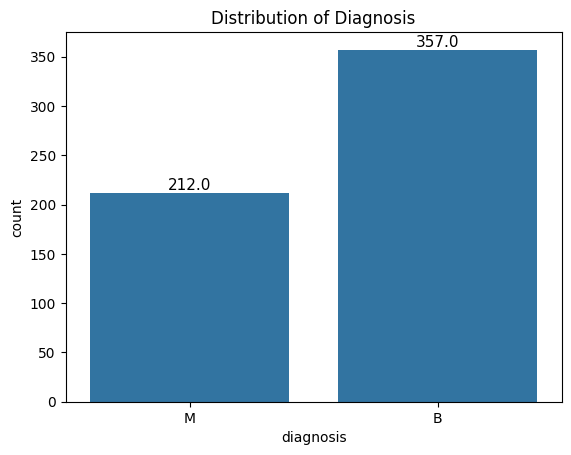

In [ ]:
# Crea el countplot con las etiquetas en el eje x
ax = sns.countplot(x='diagnosis', data=df)

# Establece el título del gráfico
plt.title("Distribution of Diagnosis")

# Agrega etiquetas para cada barra en el eje x
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

# Muestra el gráfico en pantalla
plt.show()


Conclusion: Podemos visualizar que a partir de este grafico, los registros de tumores malignos en el df es de 212 registros, mientras que la cantidad de diagnosticos que resultaron beningnos fueron de 357 registros.

In [ ]:
# Traemos todos los valores de la columna "diagnosis"
df["diagnosis"].values

array(['M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B',
       'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'M',
       'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M

In [ ]:
# Calculamos el recuento de valores individuales ('M' y 'B') en la lista 'data' y los almacena en una nueva lista llamada 'List'.
data=['M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B',
       'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'M',
       'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M',
       'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M',
       'B', 'M', 'M', 'M', 'M', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'M',
       'B', 'B', 'M', 'B', 'M', 'M', 'M', 'M', 'B', 'B', 'M', 'M', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M',
       'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M',
       'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B',
       'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'M', 'M', 'B', 'M', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M',
       'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B',
       'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M',
       'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B',
       'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'M', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'M', 'M', 'M', 'M', 'M', 'B']
List=[]
Mcount=0
Bcount=0
for x in data:
    if x=='M':
        Mcount=Mcount+1
    else:
        Bcount=Bcount+1
List.append(Mcount)
List.append(Bcount)
List

[212, 357]

        Distribución de la variable objetivo       


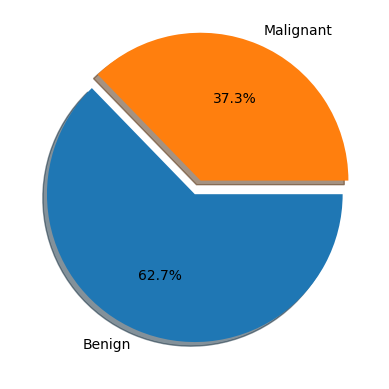

In [ ]:
#Analicemos primero la distribución de la variable objetivo.

MAP={}
for e, i in enumerate(sorted(df[target].unique())):
     MAP[i]=labels[e]
#MAP={0:'Not-Survived',1:'Survived'}
df1 = df.copy()
df1[target]=df1[target].map(MAP)
explode=np.zeros(len(labels))
explode[-1]=0.1
print('\033[1mDistribución de la variable objetivo'.center(55))
plt.pie(df1[target].value_counts(), labels=df1[target].value_counts().index, counterclock=False, shadow=True,
         explode=explode, autopct='%1.1f%%', radius=1, startangle=0)
plt.show()

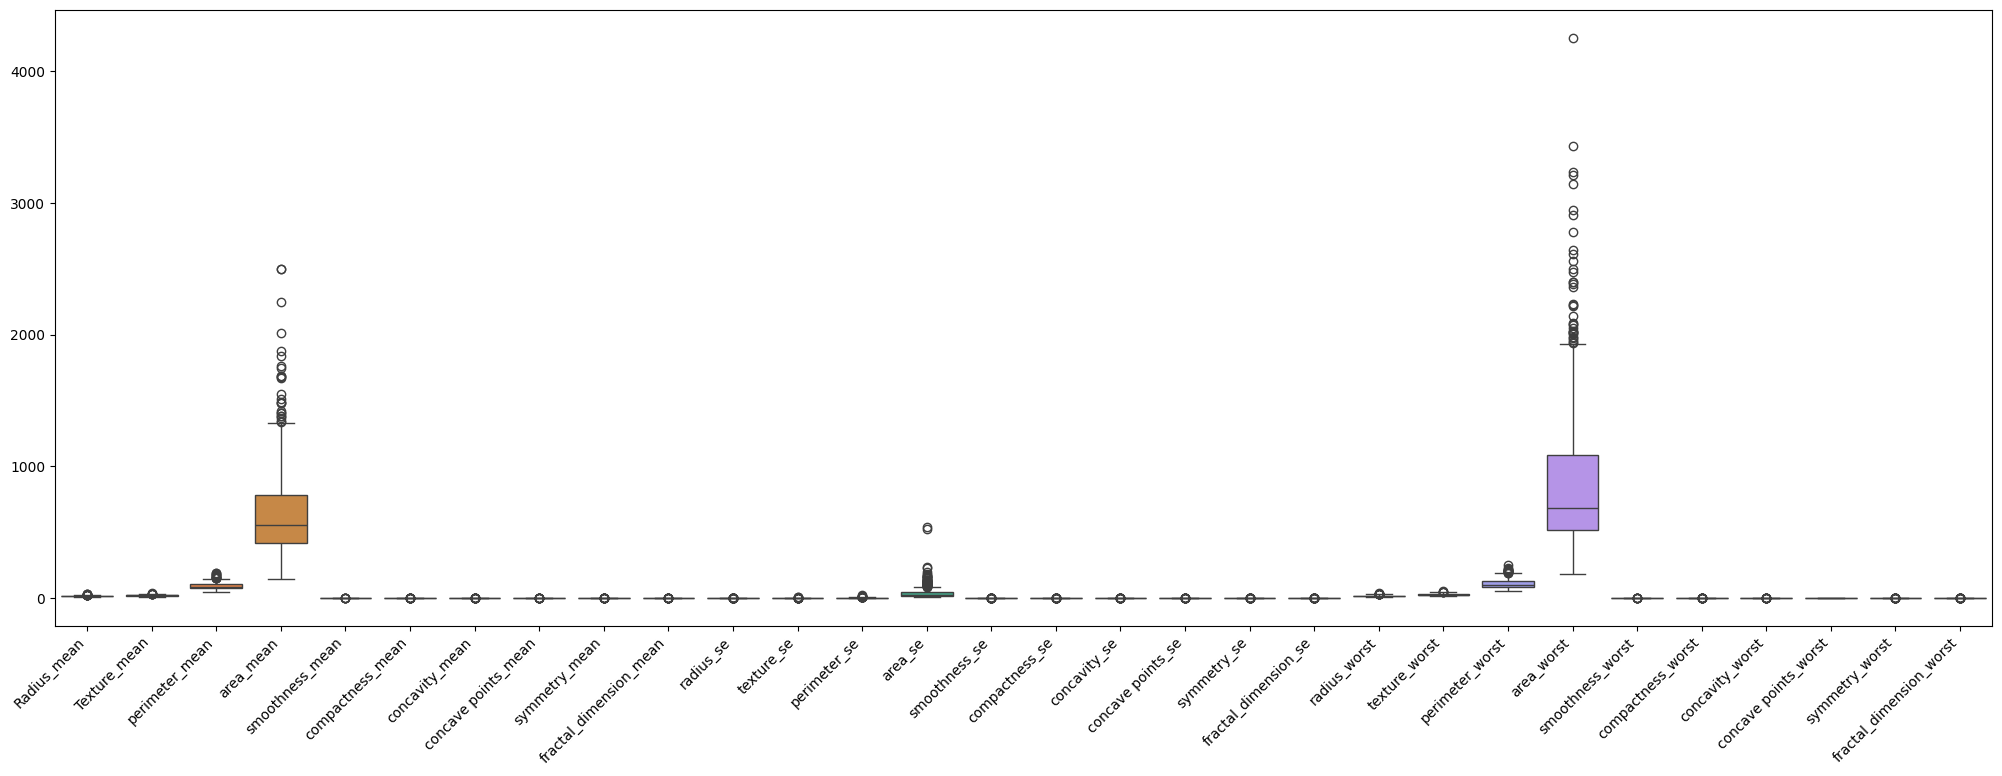

In [ ]:
# Visualizamos el df a traves de un Boxplot
plt.figure(figsize=(25, 8))
plt.xticks(rotation = 45, ha='right')
sns.boxplot(data=df)
plt.show()

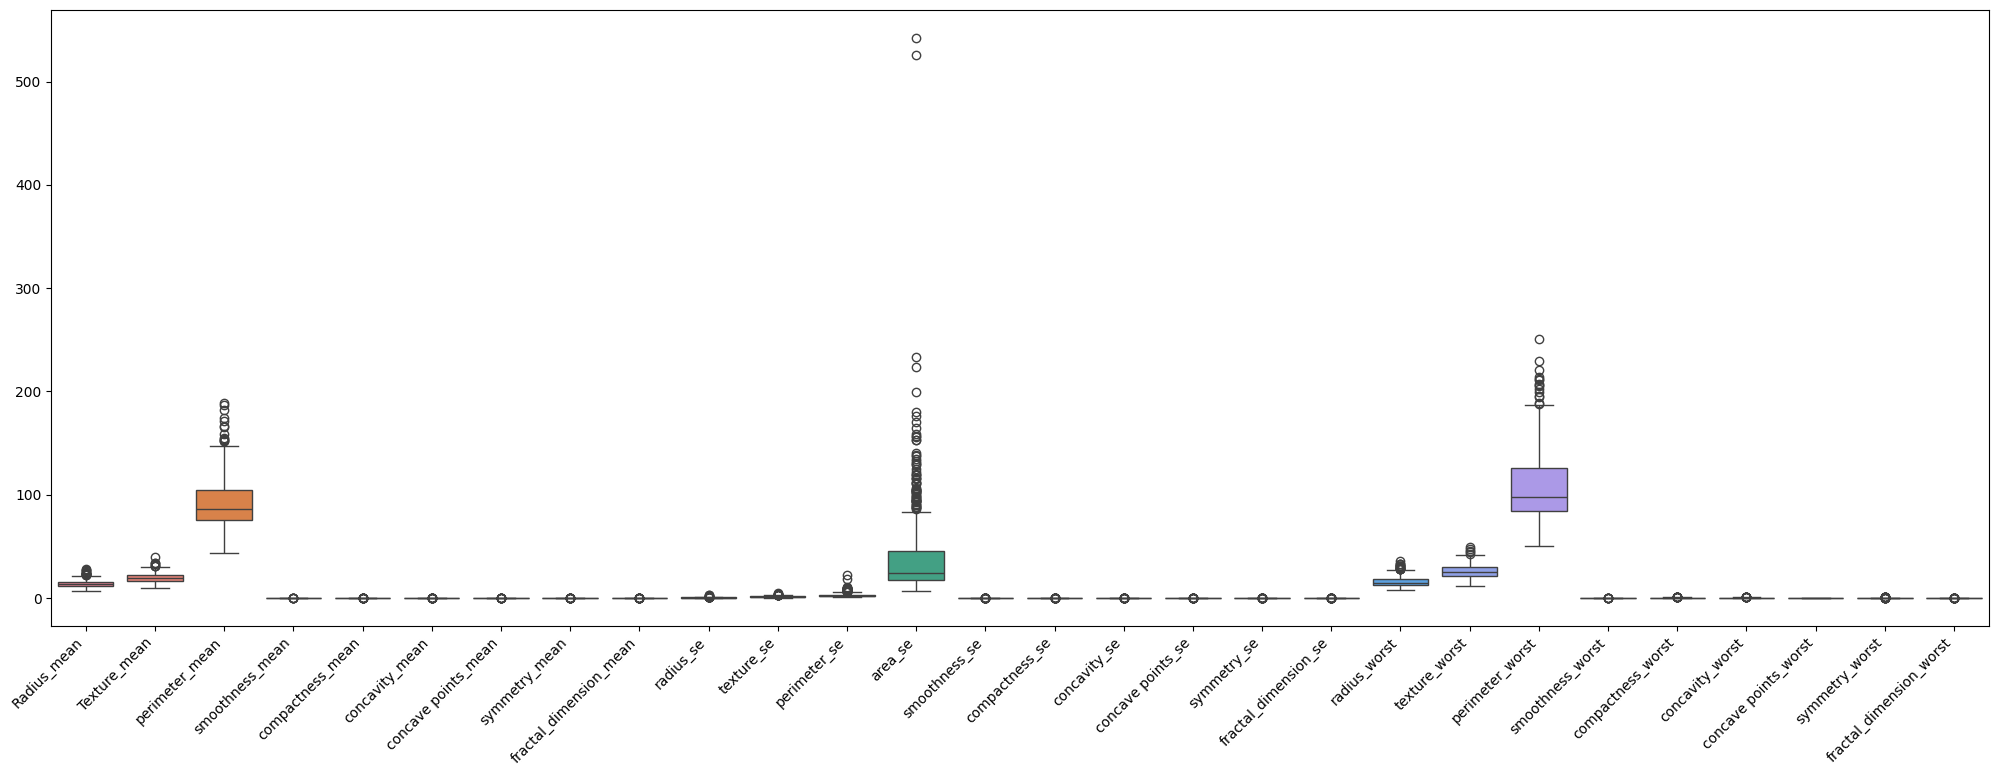

In [ ]:
plt.figure(figsize=(25, 8))
plt.xticks(rotation = 45, ha='right')
columns_to_plot = [col for col in df.columns if col not in ['area_mean', 'area_worst']]
sns.boxplot(data=df[columns_to_plot])
plt.show()

En este código, utilizamos una comprensión de lista para crear una lista llamada columns_to_plot que contiene todas las columnas excepto 'area_mean' y 'area_worst'. Luego, creamos el gráfico de boxplot utilizando solo estas columnas seleccionadas.
Esto para poder analizar el df sin las columnas mencionadas ya que limitan el analisis de las demas columnas

Los gráficos de caja (boxplots) son una herramienta útil para visualizar la distribución y los valores atípicos (outliers) de cada columna en un DataFrame.

A partir de los gráficos de boxplot de todas las columnas, podemos obtener varias conclusiones y comprender mejor la naturaleza de nuestros datos.

Los puntos fuera de los bigotes se consideran valores atípicos y pueden ser indicativos de valores inusuales o errores en los datos.

Al observar varios boxplots juntos, podemos hacer comparaciones entre las distribuciones de diferentes columnas y entender cómo se relacionan entre sí.

# ***Insights Boxplots***

**Mediana**: La posición de la línea en la caja indica la mediana de los datos. Las distribuciones de area_mean y area_worst tienen medianas similares. Esto sugiere que, en términos de la mediana, la posición central de los datos es comparable entre estas dos columnas.

**Caja**: Las columnas area_mean y area_worst tienen cajas notoriamente más amplias que las demás, esto indica que hay una mayor variabilidad en esos conjuntos de datos en comparación con las otras columnas.

**Simetría y Forma de la Distribución:** Entendemos quie si la mediana está en el centro y la caja es simétrica, la distribución puede ser aproximadamente normal. Si la mediana no está en el centro, podría indicar asimetría. Por lo tanto, en base al analisis podemos comprender de que estamos visualizando un dataset con variables asimetricas. Al analizar los boxplots vemos que la mediana está más cerca del extremo inferior, es decir, la distribución podría ser sesgada a la izquierda (negativamente asimétrica).

**Outliers:** La mayor dispersión en gran medida se explica por la presencia de valores atípicos o características únicas en esos conjuntos de datos. Al tratar con datos médicos, los outliers pueden representar casos únicos o eventos significativos desde el punto de vista clínico. Podrían indicar condiciones particulares o características de interés, y podrían ser válidos y relevantes para la investigación.

**Comparación de Grupos:** Al contar con varios boxplots en el mismo gráfico, comparamos las distribuciones a traves de diferentes grupos.

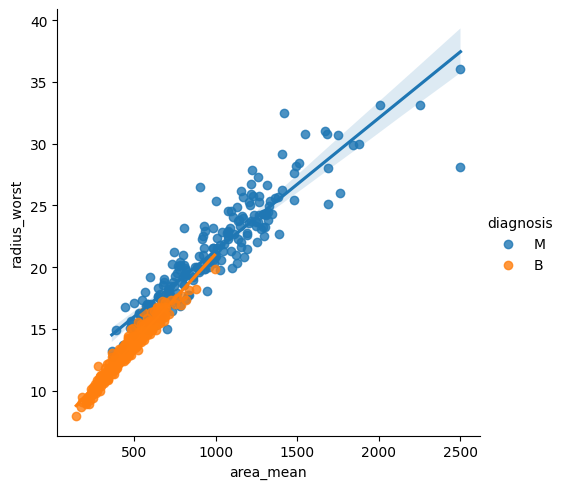

In [ ]:
sns.lmplot(x='area_mean',y='radius_worst',data=df,hue='diagnosis')

# ***Insigts Implot***

**Relación Lineal:** La inclinación de la línea de regresión indica la naturaleza de la relación entre 'area_mean' en el eje x y 'radius_worst' en el eje y. Por lo tanto, al estar inclinada hacia arriba, sugiere una relación positiva entre estas dos variables.

**Dispersión de Puntos:** La dispersión de los puntos alrededor de la línea de regresión es un indicador de cuán bien se ajusta el modelo lineal a los datos. En este caso, al notar que los registros no están demasiado dispersos, se concluye que la relación entre 'area_mean' y 'radius_worst' es más lineal.

**Modelo de Regresión:** Dada la naturaleza aparentemente lineal de la relación y la baja dispersión de puntos, se podria utilizar un modelo de regresión para predecir 'radius_worst' en función de 'area_mean'.

**Parámetro 'hue':** El uso del parámetro hue='diagnosis' agrega colores diferentes para cada valor único en la columna 'diagnosis' ('M' o 'B'). Esto facilita la visualización de cómo se distribuyen los puntos en función del diagnóstico, lo que puede proporcionar información valiosa sobre la relación en diferentes categorías de diagnóstico.

**Identificación de Outliers:** La capacidad para identificar valores atípicos (outliers) se menciona, sugiriendo que se pueden identificar algunos puntos que se alejan significativamente de la línea de regresión.

<Axes: xlabel='perimeter_mean', ylabel='Count'>

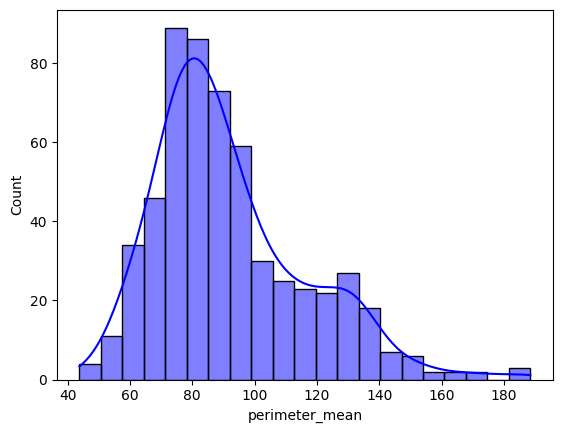

In [ ]:
sns.histplot(df.perimeter_mean,kde=True,color='b')

# ***Insights Histplot***

A partir de este gráfico, podemos obtener varias conclusiones sobre la distribución de los datos en la columna 'perimeter_mean':

La posición del pico del histograma nos da una idea de la centralidad de la distribución. El pico representa el valor más común o el valor con mayor frecuencia en la columna. En este caso, se evidencia que el valor con mas frecuencia aproxima un count de 90

La anchura del histograma nos indica la dispersión de los datos. En este caso,  el histograma es estrecho, lo que significa que los valores están agrupados cerca del valor central, pero con una leve dispersion hacia los valores mas altos en la columna.

Gráficos con Matplotlib

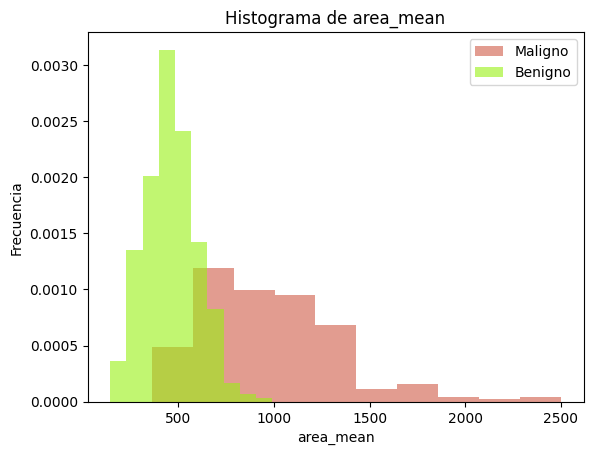

In [ ]:
data_maligno = df[df['diagnosis'] == 'M']['area_mean']
data_benigno = df[df['diagnosis'] == 'B']['area_mean']

color_maligno = '#CF5B47'
color_benigno = '#99F013'

plt.hist(data_maligno, bins=10, color=color_maligno, alpha=0.6, label='Maligno', density=True)
plt.hist(data_benigno, bins=10, color=color_benigno, alpha=0.6, label='Benigno', density=True)

plt.title("Histograma de area_mean")
plt.xlabel("area_mean")
plt.ylabel("Frecuencia")
plt.legend()

plt.show()


# ***Insights Histograma***

**Histogramas Comparativos:** Se creo dos histogramas comparativos para la columna 'area_mean', uno para casos malignos ('M') y otro para casos benignos ('B'). Esto proporciona una visualización clara de cómo se distribuyen los valores de 'area_mean' en cada grupo.

**Colores Diferenciados:** Se utilizaron colores distintos (rojo para maligno y verde para benigno) para diferenciar visualmente los histogramas, facilitando la identificación de las distribuciones asociadas con cada diagnóstico.

**Normalización y Densidad:** Al normalizar los histogramas a densidad (usando density=True), los histogramas muestran la frecuencia relativa en lugar de la frecuencia absoluta. Esto facilita la comparación visual de las proporciones de datos entre los grupos malignos y benignos.

**Interpretación del Solapamiento:** El pequeño rango de superposición puede ser considerado como un área de incertidumbre donde los casos malignos y benignos comparten valores de 'area_mean' similares. Esto puede indicar que en esta gama específica, 'area_mean' por sí sola puede no ser suficiente para distinguir entre los dos diagnósticos. A paritr de esto, entendemos que los casos en los que la distinción entre maligno y benigno es más desafiante, pueden contener información valiosa sobre la complejidad de la clasificación.

**Conclusiones sobre la Distribución:** En el análisis visual de los histogramas de 'area_mean' en relación con el diagnóstico maligno y benigno, se observan patrones distintivos. Los casos benignos muestran un pico de frecuencia alrededor del valor 500, indicando una concentración más prominente en esa área específica. Además, la anchura del histograma para casos benignos es significativamente menor en comparación con los casos malignos. En contraste, los casos malignos exhiben una distribución más amplia de 'area_mean', abarcando un rango desde 400 hasta 2500, lo que sugiere una mayor variabilidad en esta característica para los casos malignos. Se identifica un solapamiento entre los dos diagnósticos en el rango de 400 a 1000 de 'area_mean', indicando que en esta área específica ambos diagnósticos pueden ocurrir, lo que destaca la necesidad de considerar otras características para una clasificación más precisa.

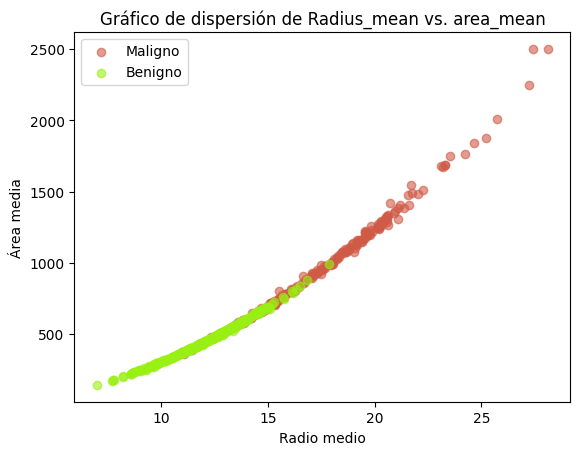

In [ ]:
color_maligno = '#CF5B47'
color_benigno = '#99F013'

plt.scatter(df[df['diagnosis'] == 'M']['Radius_mean'], df[df['diagnosis'] == 'M']['area_mean'], color=color_maligno, label='Maligno', alpha=0.6)
plt.scatter(df[df['diagnosis'] == 'B']['Radius_mean'], df[df['diagnosis'] == 'B']['area_mean'], color=color_benigno, label='Benigno', alpha=0.6)

plt.xlabel('Radio medio')
plt.ylabel('Área media')
plt.title('Gráfico de dispersión de Radius_mean vs. area_mean')
plt.legend()

plt.show()


# ***Insights Scatter Plot***

En el análisis del gráfico de dispersión que compara 'Radius_mean' y 'area_mean' para casos malignos y benignos, se observan patrones distintivos. Aquí se presenta una descripción detallada de las conclusiones extraídas:

Se utilizaron colores específicos ('#CF5B47' para casos malignos y '#99F013' para casos benignos) para diferenciar visualmente los puntos en el gráfico, facilitando la identificación de casos malignos y benignos.

El gráfico muestra cómo se distribuyen los casos en función de 'Radius_mean' y 'area_mean'. La forma y patrones de dispersión proporcionan información sobre la relación entre estas dos variables.

Se identifican agrupamientos que sugieren una relación específica entre 'Radius_mean' y 'area_mean'. La observación de patrones en el gráfico puede ayudar a entender si existe una correlación o tendencia entre estas dos variables.

Se destaca que los casos benignos tienden a concentrarse en un rango más limitado en comparación con los casos malignos. Los puntos benignos se agrupan en el rango de 10 a 15 en 'Radius_mean' y de 100 a 800 en 'area_mean', mientras que los casos malignos muestran una distribución más dispersa, abarcando valores más altos en ambos ejes.

Comparando con el histograma anterior, se confirma la presencia de superposición en el rango de 'area_mean' entre aproximadamente 400 y 1000, como se observó previamente. Sin embargo, el gráfico de dispersión proporciona una representación más detallada de cómo se distribuyen individualmente los casos malignos y benignos en el espacio bidimensional definido por 'Radius_mean' y 'area_mean'.

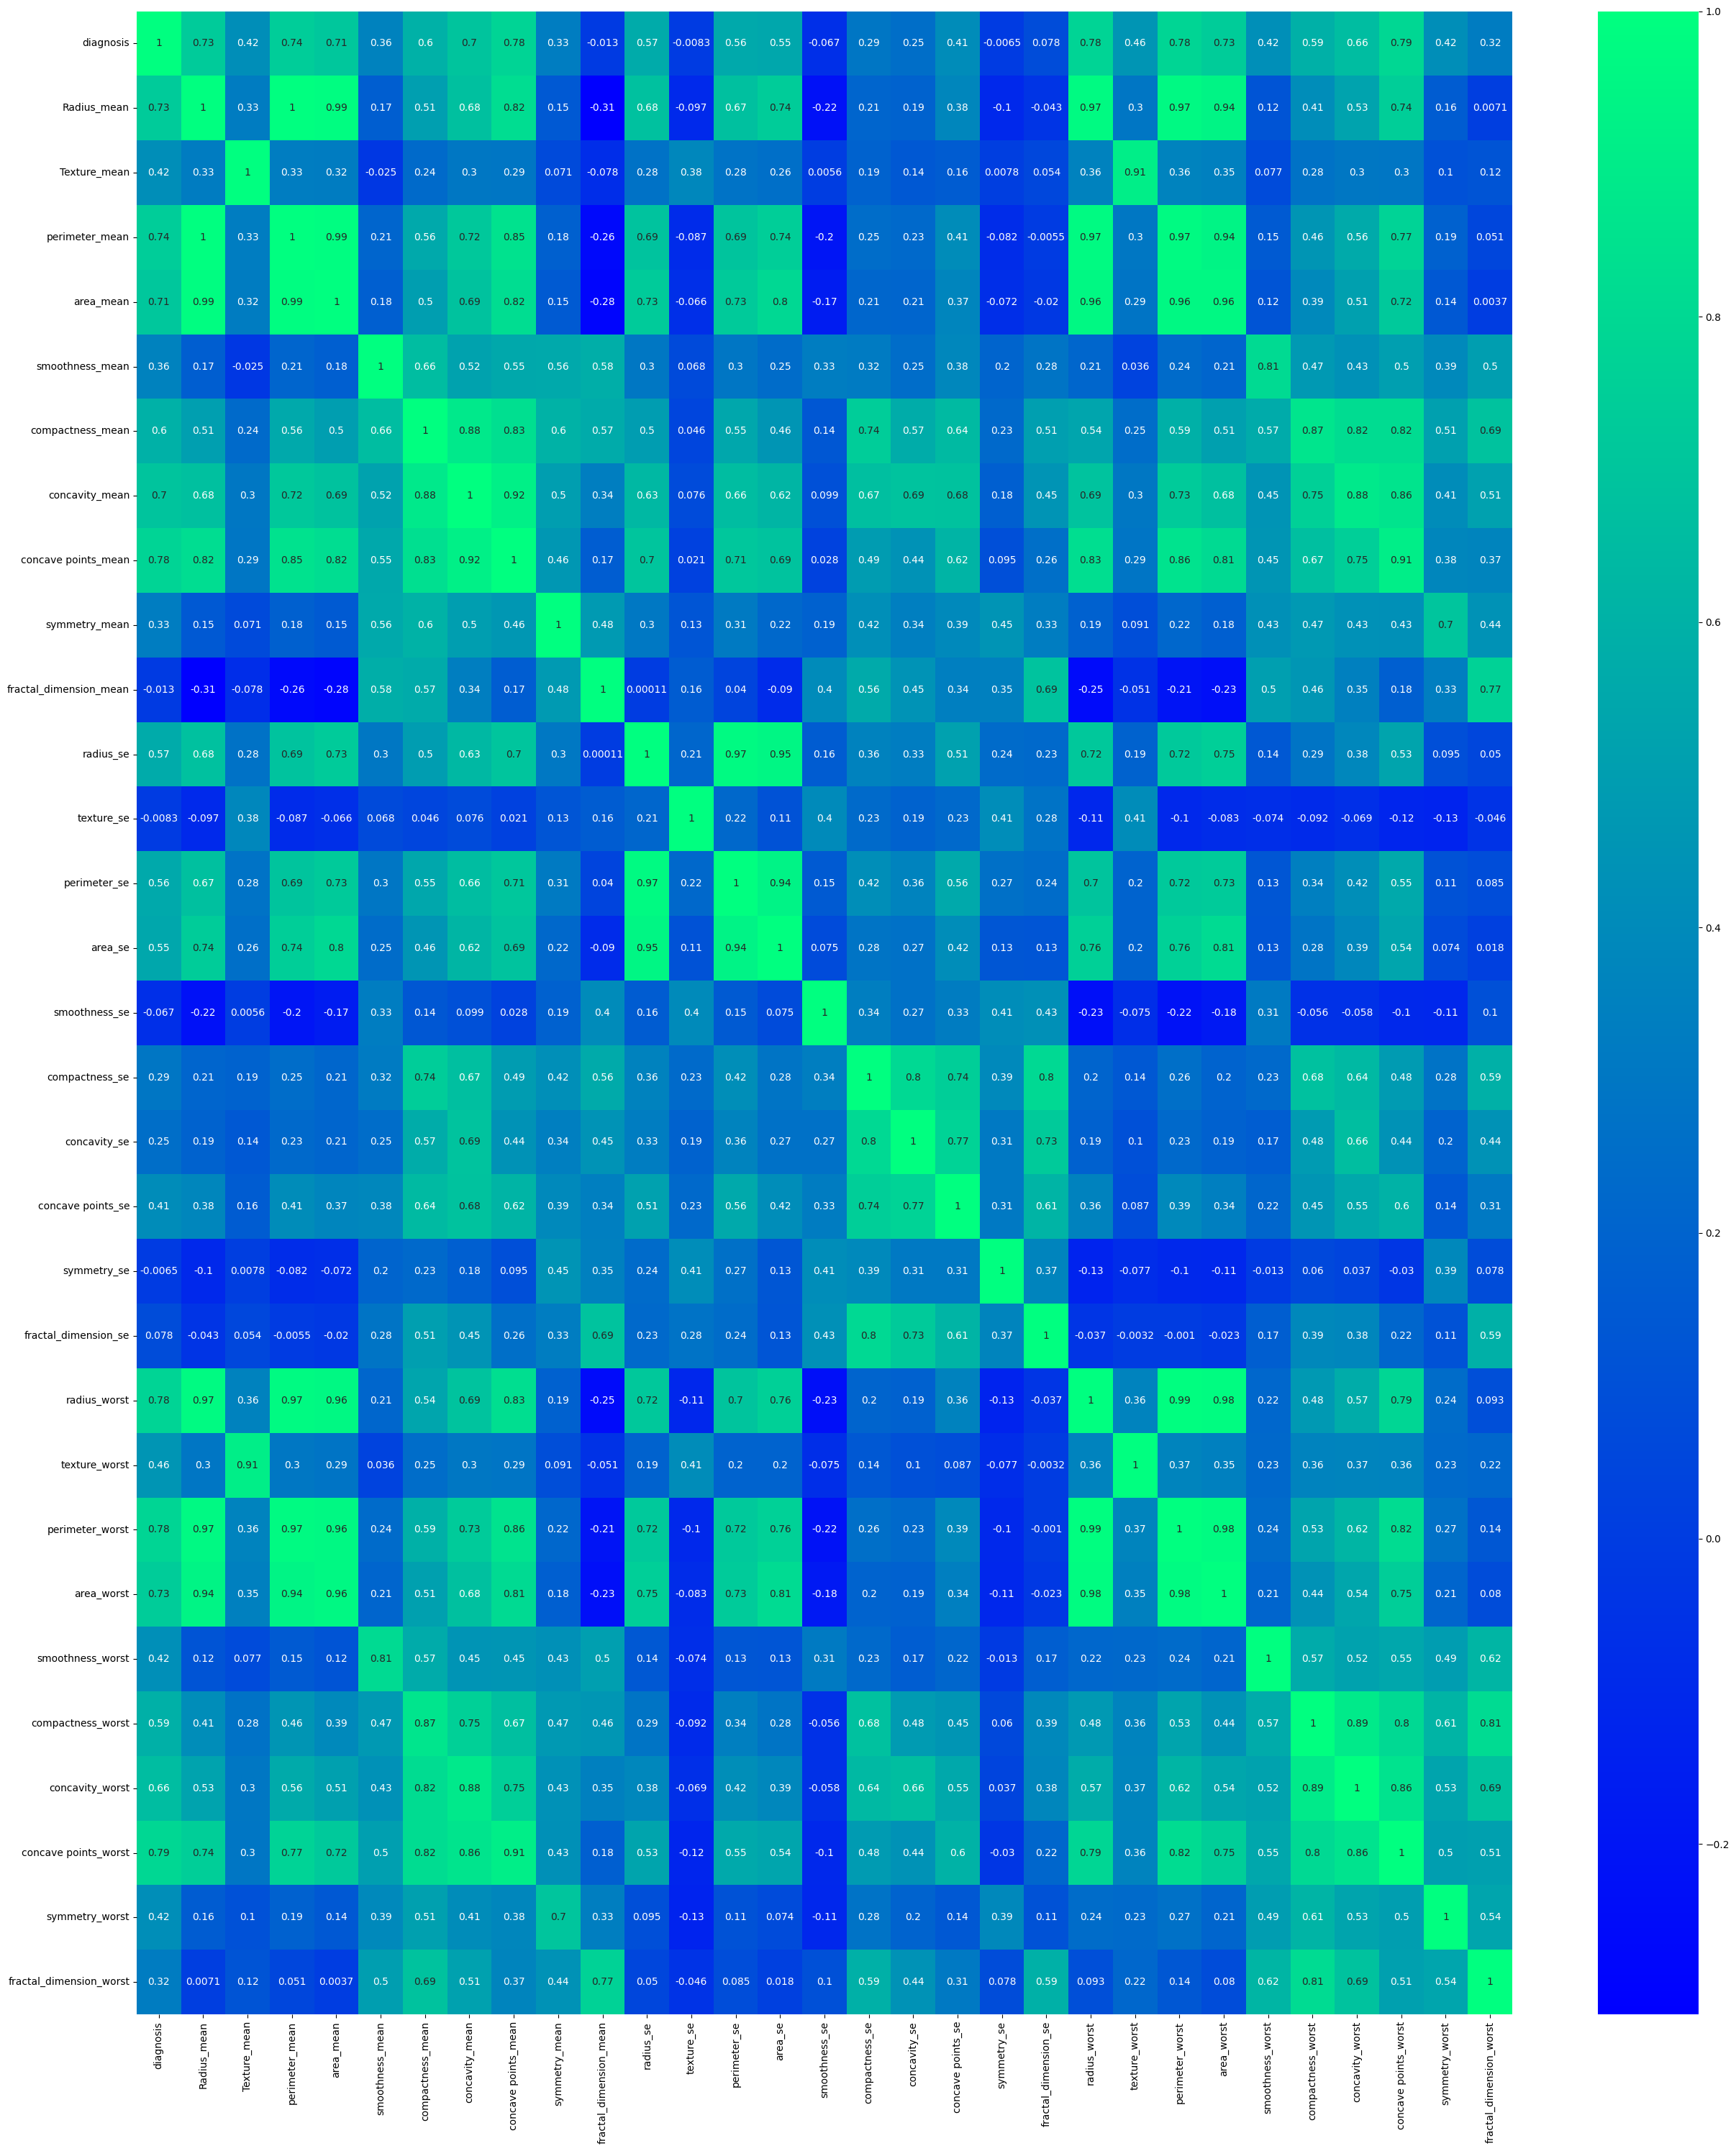

In [ ]:
df_encoded = df.copy()

label_encoder = LabelEncoder()
df_encoded['diagnosis'] = label_encoder.fit_transform(df['diagnosis'])

correlation = df_encoded.corr()

plt.figure(figsize=(26, 30))
sns.heatmap(correlation, annot=True, cmap="winter")
plt.tight_layout()
plt.show()

Gráficos Univariados: Histogramas, Gráfico de Barras, Box Plots

Gráficos Bivariados: Scatter Plots

Gráficos Multivariados: Heatmap de Correlación, Implot

Como vimos en el grafico en el que analizabamos la distribución de la variable objetivo. La variable objetivo parece estar ligeramente desequilibrada, por lo tanto, intentaremos realizar un aumento de datos.

In [ ]:
# Excluir la columna 'id' de las características antes de calcular nu
features_without_id = [col for col in features if col != 'id']
nu = df[features_without_id].nunique().sort_values()

nf = []
cf = []
nnf = 0
ncf = 0

for i in range(df[features_without_id].shape[1]):
    if nu.values[i] <= 7:
        cf.append(nu.index[i])
    else:
        nf.append(nu.index[i])

print('\n\033[1mInference:\033[0m El Dataset tiene {} columnas numericas y {} categoricas.'.format(len(nf), len(cf)))



Inference: El Dataset tiene 30 columnas numericas y 0 categoricas.


In [ ]:
#Visualizamos las columnas categoricas

print('\033[1mColumnas Categoricas:'.center(35))

n=3
plt.figure(figsize=[15,3*math.ceil(len(cf)/n)])

for i in range(len(cf)):
    if df[cf[i]].nunique()<=6:
        plt.subplot(math.ceil(len(cf)/n),n,i+1)
        sns.countplot(df[cf[i]])
    else:
        plt.subplot(3,1,i-1)
        sns.countplot(df[cf[i]])
plt.tight_layout()
plt.show()

     Columnas Categoricas:     


<Figure size 1500x0 with 0 Axes>

Los datos tienen una distribución algo normal. Y hay muchos valores atípicos presentes en el conjunto de datos. Arreglaremos estos valores atípicos. La visualización de las columnas categóricas revela mucha información sobre el conjunto de datos.

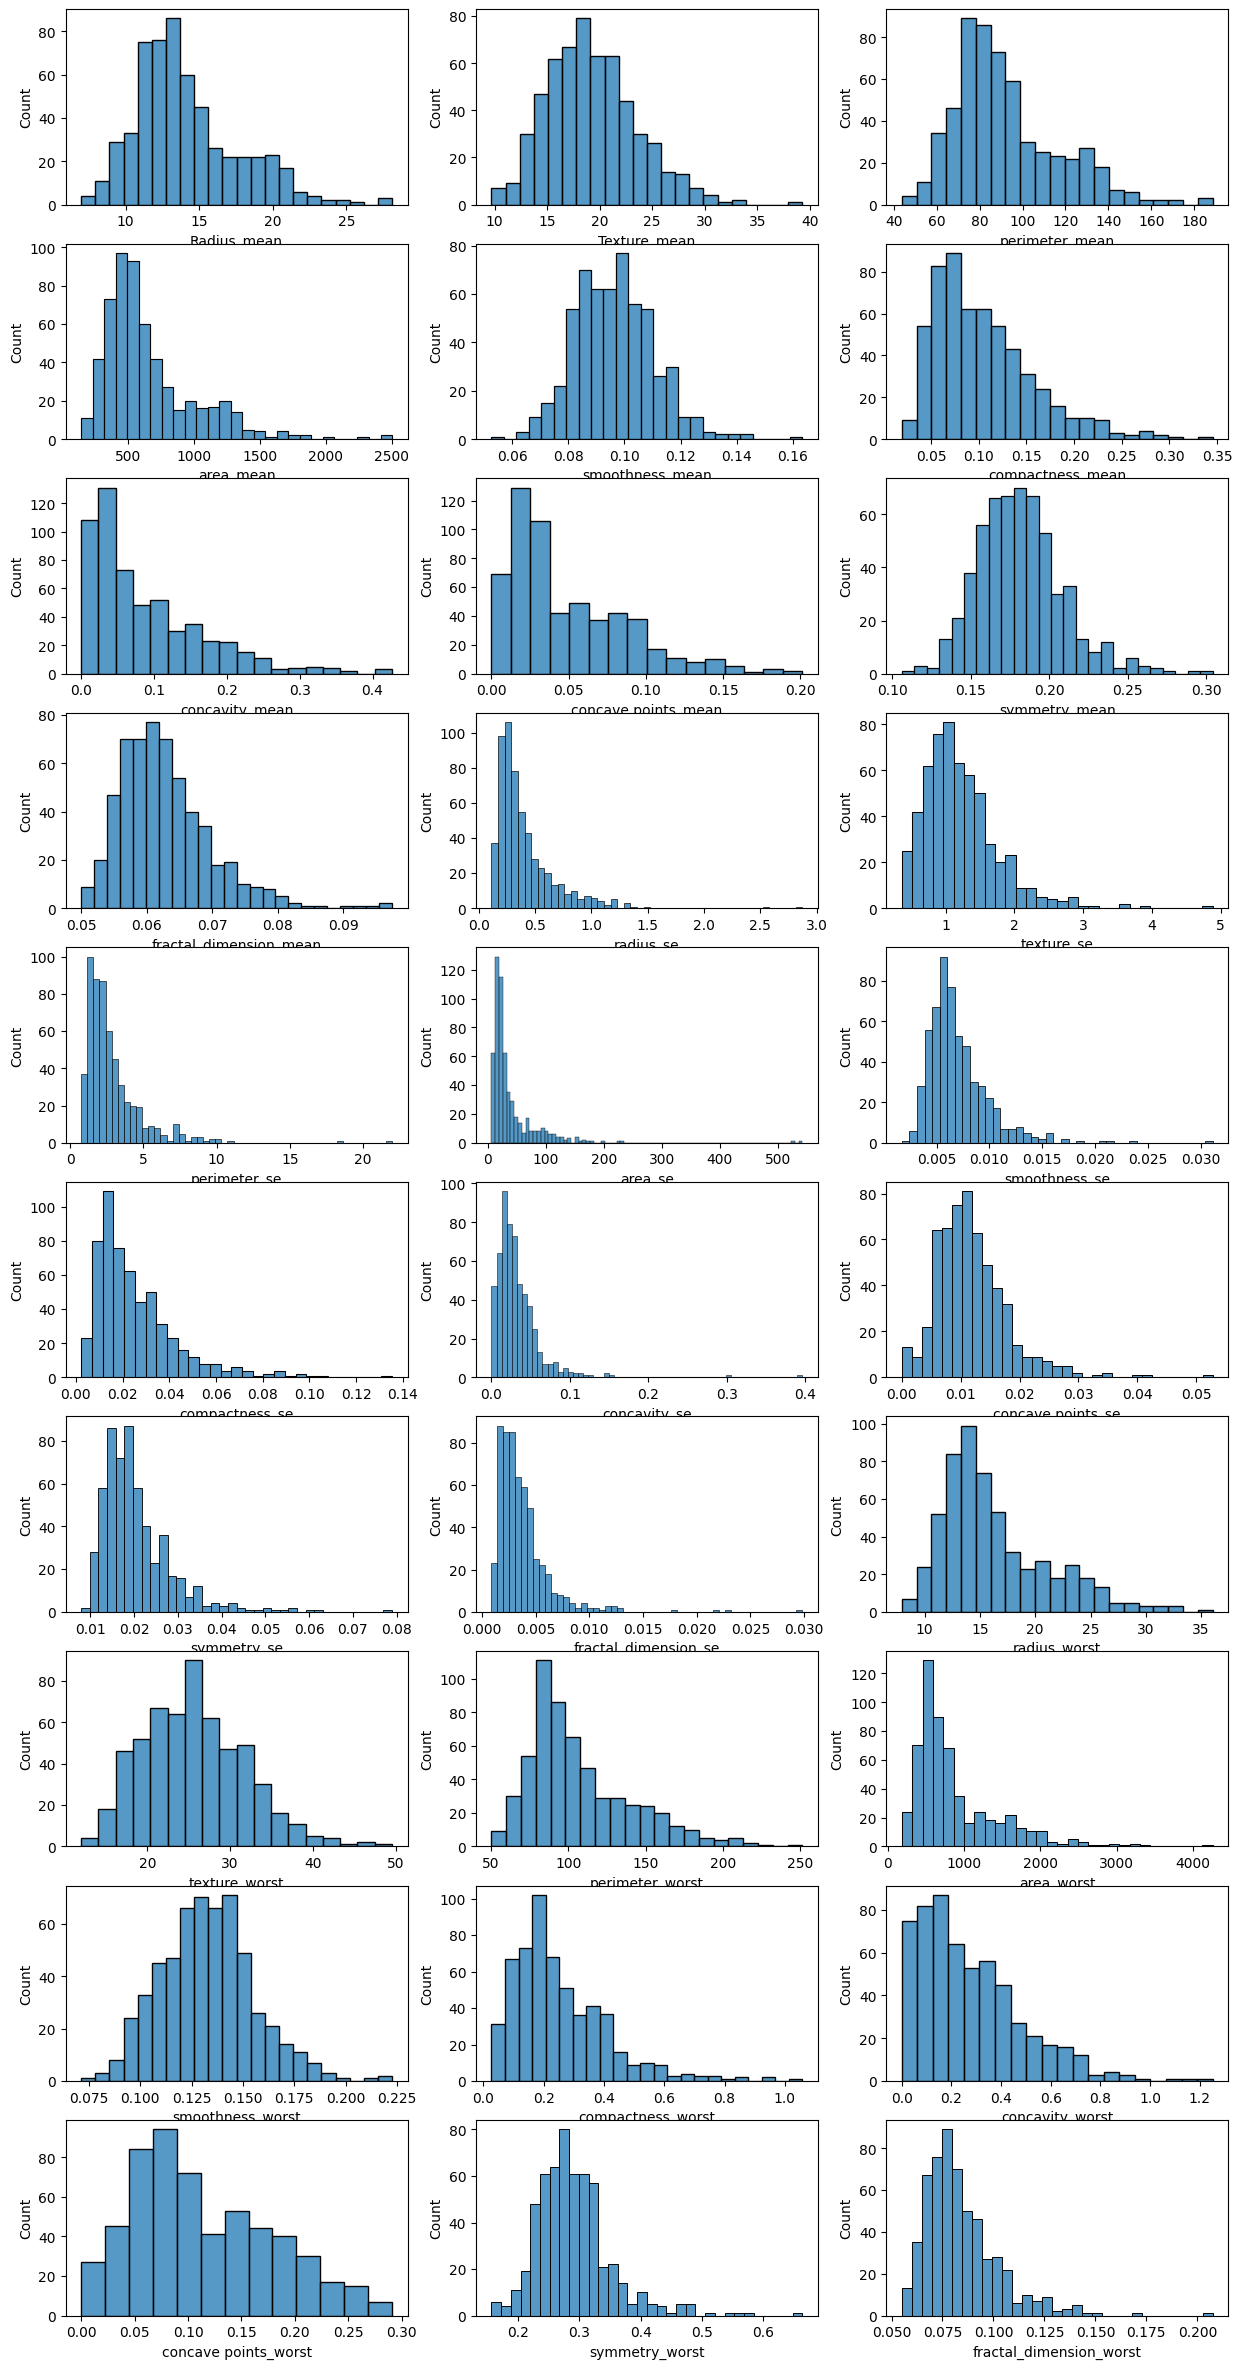

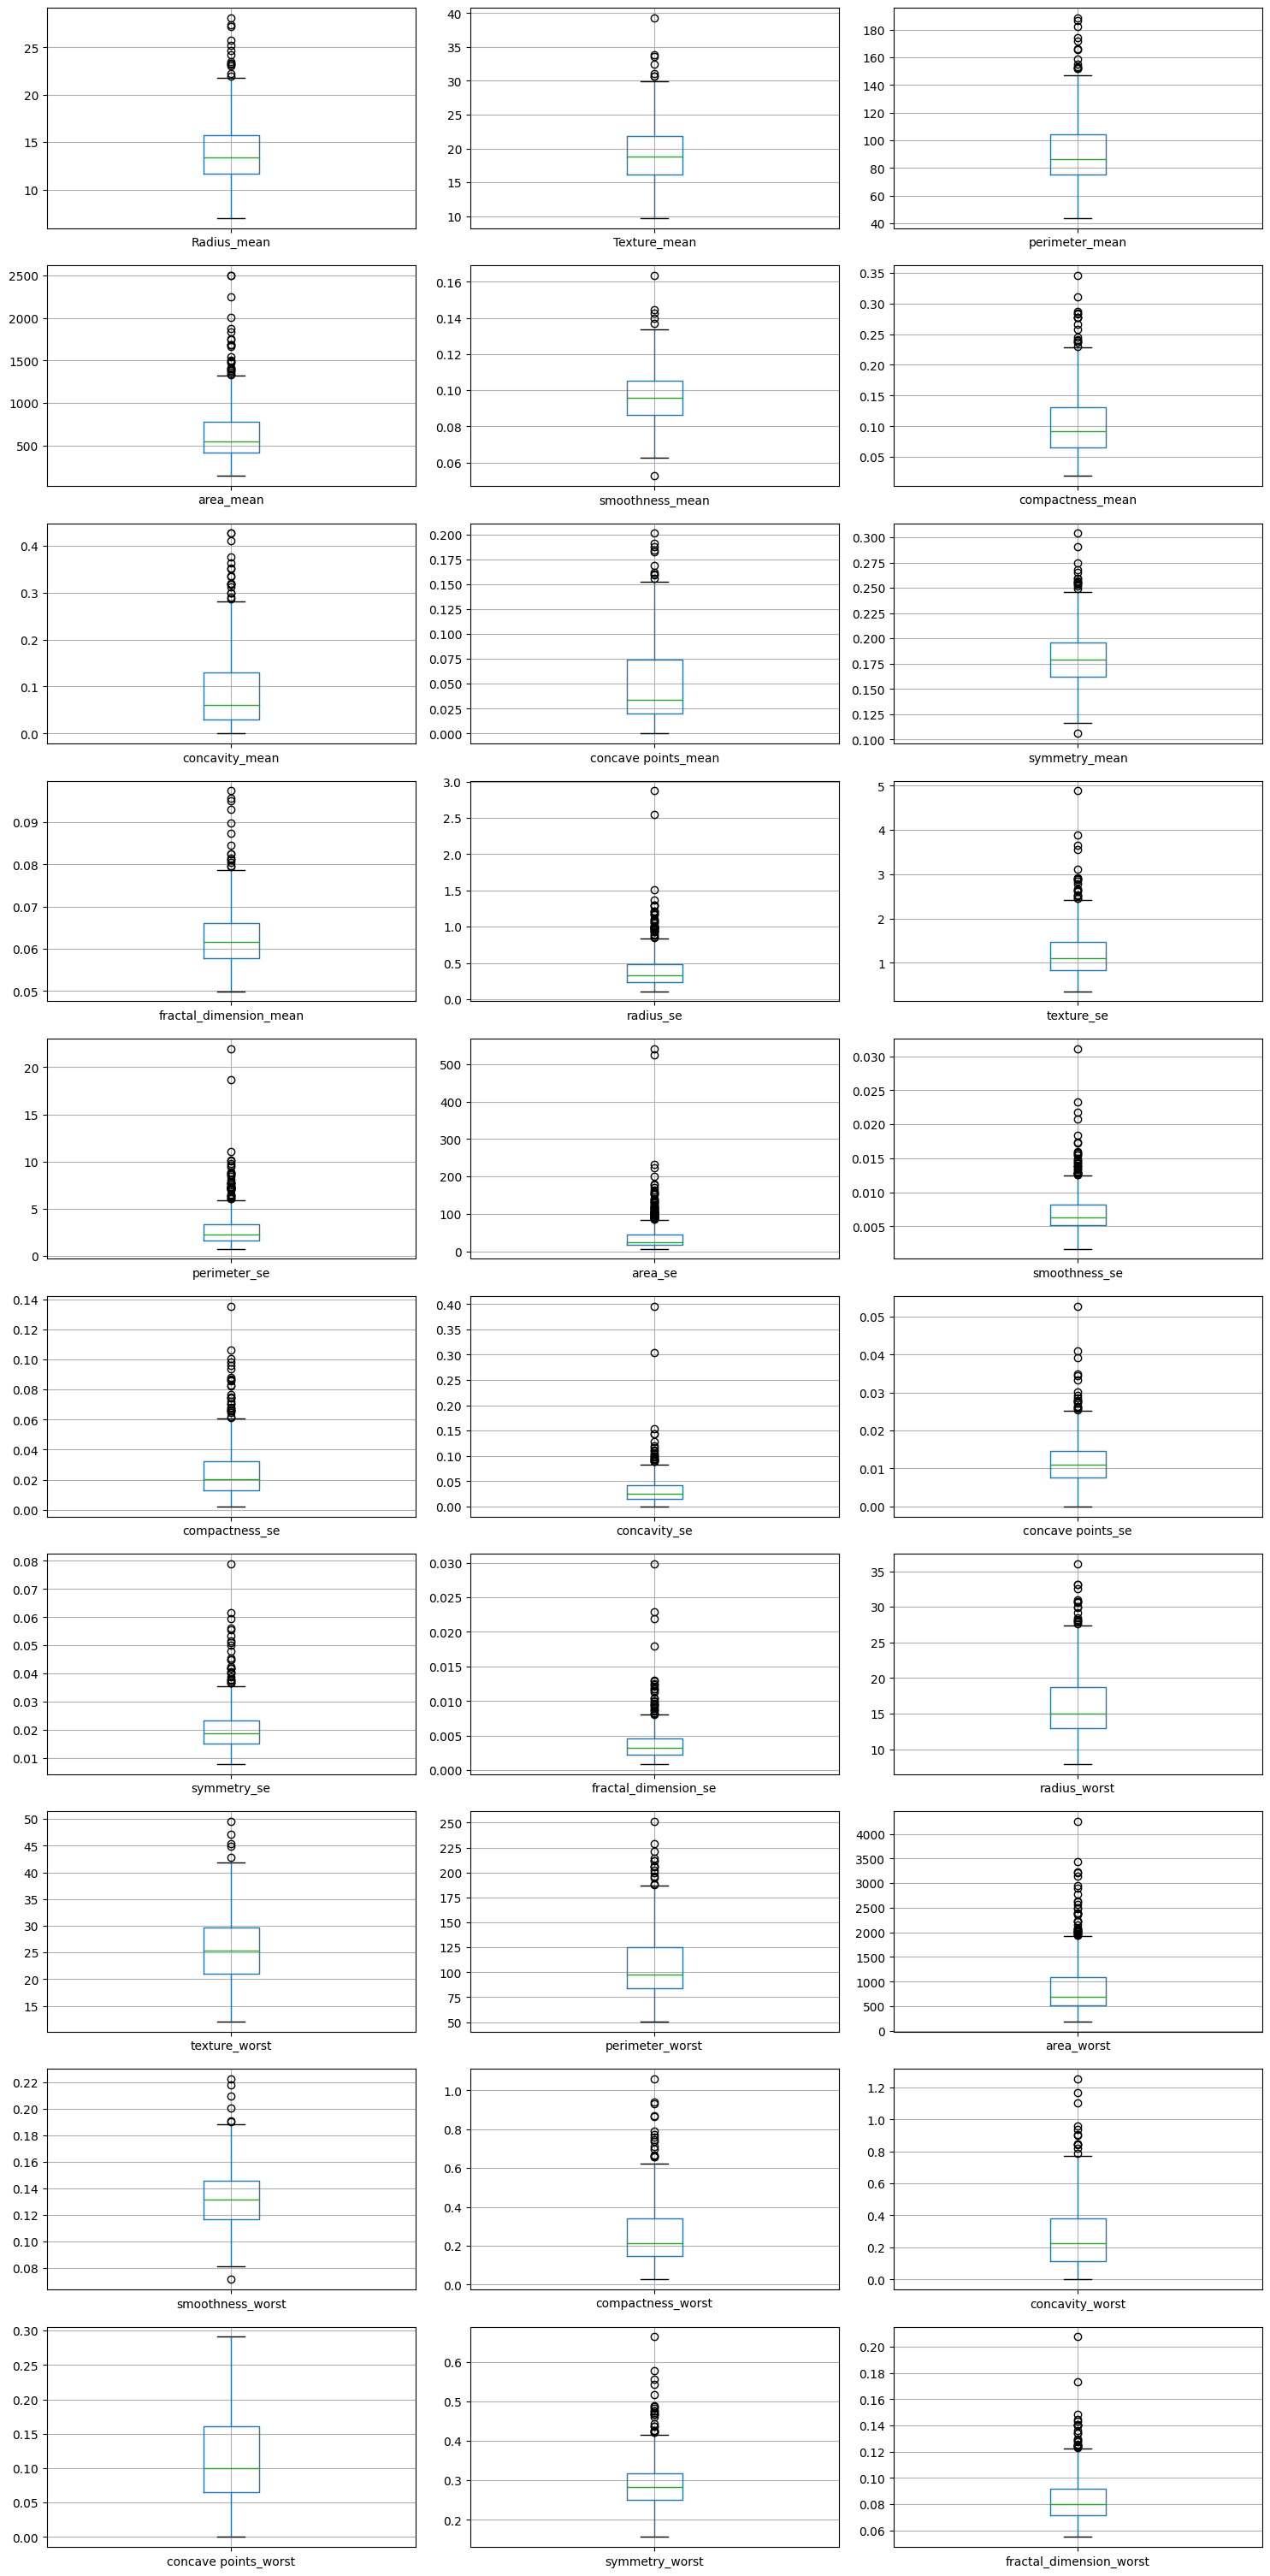

In [ ]:
nf = [i for i in features if i not in cf and i != 'id']

plt.figure(figsize=[15, 3 * math.ceil(len(features) / n)])
for c in range(len(nf)):
    plt.subplot(math.ceil(len(features) / n), n, c + 1)
    sns.histplot(df[nf[c]])
plt.show()

plt.figure(figsize=[15, 3 * math.ceil(len(features) / n)])
for c in range(len(nf)):
    plt.subplot(math.ceil(len(features) / n), n, c + 1)
    df.boxplot(nf[c])
plt.tight_layout()
plt.show()


Las muestras de datos de la mayoría de las características muestran algunos patrones. También parecen tener mucha superposición en las clases de resultados, lo que dificulta su distinción. Procedamos a realizar una limpieza de los datos para eliminar las irregularidades.

# ***Pre-Procesamiento de Datos***

In [ ]:
#Removemos los registros duplicados (si los hay)

counter = 0
r,c = original_df.shape

df1 = df.copy()
df1.drop_duplicates(inplace=True)
df1.reset_index(drop=True,inplace=True)

if df1.shape==(r,c):
    print('\n\033[1mInferencia:\033[0m El Dataset no tiene ningun duplicado')
else:
    print(f'\n\033[1mInferencia:\033[0m Numeros de duplicados eliminados ---> {r-df1.shape[0]}')


Inferencia: Numeros de duplicados eliminados ---> -101


In [ ]:
#Comprobamos si hay valores nulos

nvc = pd.DataFrame(df1.isnull().sum().sort_values(), columns=['Total Null Values'])
nvc['Percentage'] = round(nvc['Total Null Values']/df1.shape[0],3)*100
print(nvc)

                         Total Null Values  Percentage
diagnosis                                0         0.0
concave points_worst                     0         0.0
concavity_worst                          0         0.0
compactness_worst                        0         0.0
smoothness_worst                         0         0.0
area_worst                               0         0.0
perimeter_worst                          0         0.0
texture_worst                            0         0.0
radius_worst                             0         0.0
fractal_dimension_se                     0         0.0
symmetry_se                              0         0.0
concave points_se                        0         0.0
concavity_se                             0         0.0
compactness_se                           0         0.0
symmetry_worst                           0         0.0
smoothness_se                            0         0.0
perimeter_se                             0         0.0
texture_se

Hay muchos valores atípicos en el conjunto de datos. Intentemos imputar los valores faltantes.

In [ ]:
#Convertimos los features categoricos en numericos

#df1 = df.copy()
ecc = nvc[nvc['Percentage']!=0].index.values
dcc = [i for i in df.columns if i not in ecc]

#Variable Objetivo
MAP={}
for i,e in enumerate(df1[target].unique()):
    MAP[e]=i
df1[target]=df1[target].map(MAP)
print('Variable Objetivo --->',MAP)

df3 = df1[dcc]
fcc = [i for i in cf if i not in ecc]

#Codificación binaria
oh=True
dm=True
for i in fcc:
    #print(i)
    if df3[i].nunique()==2:
        if oh==True: print("\033[1m\nOne-Codificacion Hot sobre columnas:\033[0m")
        print(i);oh=False
        df3[i]=pd.get_dummies(df3[i], drop_first=True, prefix=str(i))
    if (df3[i].nunique()>2 and df3[i].nunique()<17):
        if dm==True: print("\n\033[1mCodificacion Dummy sobre columnas:\033[0m")
        print(i);dm=False
        df3 = pd.concat([df3.drop([i], axis=1), pd.DataFrame(pd.get_dummies(df3[i], drop_first=True, prefix=str(i)))],axis=1)

df3.shape

Variable Objetivo ---> {0: 0, 1: 1}


(670, 31)

In [ ]:
#Removemos los outliers

df4 = df3.copy()

for i in [i for i in df4.columns]:
    if df4[i].nunique()>=12:
        Q1 = df4[i].quantile(0.15)
        Q3 = df4[i].quantile(0.85)
        IQR = Q3 - Q1
        df4 = df4[df4[i] <= (Q3+(1.5*IQR))]
        df4 = df4[df4[i] >= (Q1-(1.5*IQR))]
df4 = df4.reset_index(drop=True)
display(df4.head())
print('\n\033[1mInferencia:\033[0m Antes de eliminar los outliers, el dataset tenia {} registros.'.format(df1.shape[0]))
print('\033[1mInferencia:\033[0m Posterior a eliminar los outliers, el dataset tiene {} registros.'.format(df4.shape[0]))

,diagnosis,Radius_mean,Texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,20.57,21.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.2,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
3,0,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,...,15.47,23.75,103.4,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
4,0,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.1127,0.07400,0.1794,...,22.88,27.66,153.2,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368



Inferencia: Antes de eliminar los outliers, el dataset tenia 670 registros.
Inferencia: Posterior a eliminar los outliers, el dataset tiene 669 registros.


In [ ]:
#Corrección del desequilibrio mediante la técnica SMOTE.
from imblearn.over_sampling import SMOTE
df5 = df4.copy()

print('Original class distribution:')
print(df5[target].value_counts())

xf = df5.columns
X = df5.drop([target],axis=1)
Y = df5[target]

smote = SMOTE()
X, Y = smote.fit_resample(X, Y)

df5 = pd.DataFrame(X, columns=xf)
df5[target] = Y

print('\nClass distribution after applying SMOTE Technique:',)
print(Y.value_counts())

Original class distribution:
0    335
1    334
Name: diagnosis, dtype: int64

Class distribution after applying SMOTE Technique:
0    335
1    335
Name: diagnosis, dtype: int64


ValueError: Wedge sizes 'x' must be non negative values

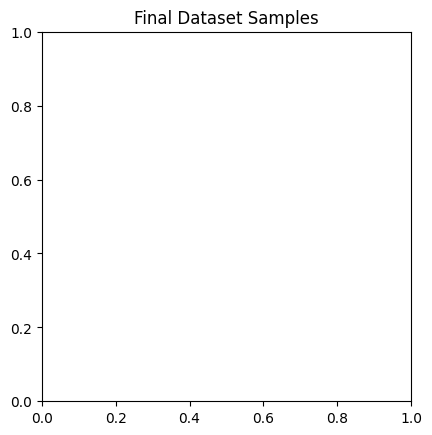

In [ ]:
#Tamaño final del conjunto de datos después de realizar el preprocesamiento

df = df5.copy()
plt.title('Final Dataset Samples')
plt.pie([df.shape[0], original_df.shape[0]-df4.shape[0], df5.shape[0]-df4.shape[0]], radius = 1, shadow=True,
        labels=['Datos retenidos','Datos eliminados','Datos sumados'], counterclock=False, autopct='%1.1f%%', pctdistance=0.9, explode=[0,0,0])
plt.pie([df.shape[0]], labels=['100%'], labeldistance=-0, radius=0.78, shadow=True, colors=['powderblue'])
plt.show()

print('\n\033[1mInferencia:\033[0mEl dataset final luego del preprocesamiento tiene {} registros & {} columnas.'.format(df.shape[0], df.shape[1]))

# ***Manipulacion de los datos***

In [ ]:
#Dividir los datos en conjuntos de entrenamiento y prueba.

df = df5.copy()

X = df.drop([target],axis=1)
Y = df[target]
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=0)

print('Original ---> ',X.shape,Y.shape,'\nTraining ---> ',Train_X.shape,Train_Y.shape,'\nTesting ---> ', Test_X.shape,'', Test_Y.shape)

Original --->  (670, 30) (670,) 
Training --->  (536, 30) (536,) 
Testing --->  (134, 30)  (134,)


In [ ]:
#Escalado de Features (estandarización)

std = StandardScaler()

print('\033[1mEstandarizacion sobre Training'.center(100))
Train_X_std = std.fit_transform(Train_X)
Train_X_std = pd.DataFrame(Train_X_std, columns=X.columns)
display(Train_X_std.describe())

print('\n','\033[1mEstandarizacion sobre Testing'.center(100))
Test_X_std = std.transform(Test_X)
Test_X_std = pd.DataFrame(Test_X_std, columns=X.columns)
display(Test_X_std.describe())

                                 Estandarizacion sobre Training                                 


,Radius_mean,Texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.360000e+02,5.360000e+02,5.360000e+02,5.360000e+02,5.360000e+02,5.360000e+02,5.360000e+02,5.360000e+02,5.360000e+02,5.360000e+02,...,5.360000e+02,5.360000e+02,5.360000e+02,5.360000e+02,5.360000e+02,5.360000e+02,5.360000e+02,5.360000e+02,5.360000e+02,5.360000e+02
mean,-1.325639e-17,2.651279e-16,-2.253587e-16,5.302558e-17,-5.302558e-17,-5.633968e-17,1.988459e-17,2.121023e-16,-1.550998e-15,9.776591e-16,...,-1.988459e-17,-2.187305e-16,-7.291017e-17,-1.325639e-16,1.726645e-15,8.533804e-17,-7.953837e-17,-4.010059e-16,6.155938e-16,2.319869e-17
std,1.000934e+00,1.000934e+00,1.000934e+00,1.000934e+00,1.000934e+00,1.000934e+00,1.000934e+00,1.000934e+00,1.000934e+00,1.000934e+00,...,1.000934e+00,1.000934e+00,1.000934e+00,1.000934e+00,1.000934e+00,1.000934e+00,1.000934e+00,1.000934e+00,1.000934e+00,1.000934e+00
min,-2.388040e+00,-2.518706e+00,-2.346065e+00,-1.793439e+00,-2.835690e+00,-1.970989e+00,-1.376241e+00,-1.518070e+00,-2.880665e+00,-2.206761e+00,...,-2.009527e+00,-2.530811e+00,-2.005764e+00,-1.501499e+00,-2.623021e+00,-1.713502e+00,-1.588489e+00,-2.036581e+00,-2.574952e+00,-1.950990e+00
25%,-7.748882e-01,-7.021840e-01,-7.845492e-01,-7.816954e-01,-7.131981e-01,-7.951176e-01,-8.604363e-01,-8.638143e-01,-7.368831e-01,-7.644661e-01,...,-8.109403e-01,-7.169700e-01,-8.311666e-01,-8.036954e-01,-6.414288e-01,-7.654800e-01,-8.365025e-01,-8.357556e-01,-7.108008e-01,-7.315522e-01
50%,-2.152371e-01,-1.605012e-02,-2.206714e-01,-2.987795e-01,6.434385e-03,-7.291975e-02,-1.756254e-01,-1.658780e-01,3.407006e-02,-9.064787e-02,...,-2.242180e-01,-3.019510e-03,-1.736018e-01,-3.302112e-01,6.824261e-03,-1.812649e-01,-8.289758e-02,-1.585784e-02,-5.959664e-02,-1.622760e-01
75%,7.886562e-01,6.035001e-01,8.110717e-01,7.486945e-01,7.070557e-01,6.921555e-01,7.343175e-01,8.297144e-01,6.593333e-01,6.209654e-01,...,7.098893e-01,7.080943e-01,7.422673e-01,6.192920e-01,6.661271e-01,6.590716e-01,6.620629e-01,8.330855e-01,6.483148e-01,5.721215e-01
max,2.594052e+00,3.475628e+00,2.776604e+00,3.095629e+00,3.038034e+00,4.031752e+00,3.771954e+00,3.042305e+00,3.368618e+00,3.373785e+00,...,2.514482e+00,4.042480e+00,2.586233e+00,3.022990e+00,2.761900e+00,3.609627e+00,3.285731e+00,2.654573e+00,3.794634e+00,3.354472e+00



                                  Estandarizacion sobre Testing                                  


,Radius_mean,Texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,...,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000
mean,-0.011460,-0.113620,-0.014657,-0.000320,-0.084803,-0.074692,-0.027398,-0.032709,0.029098,-0.083312,...,-0.036760,-0.152064,-0.036367,-0.037528,-0.070194,-0.067351,-0.061347,-0.066779,0.036429,-0.116968
std,1.049943,0.926854,1.049375,1.060623,1.109506,1.049193,1.024018,1.032270,1.084429,1.049192,...,0.987021,0.933711,0.997844,0.983206,1.134292,1.028731,0.978112,1.013553,1.138792,1.074031
min,-2.149778,-2.264858,-2.161714,-1.674580,-3.653163,-1.626051,-1.376241,-1.518070,-2.639433,-1.873588,...,-1.680586,-2.381896,-1.727875,-1.343194,-2.483548,-1.619402,-1.588489,-2.036581,-2.422426,-1.833675
25%,-0.748956,-0.767531,-0.781546,-0.755721,-0.945491,-0.957904,-0.856063,-0.891488,-0.758503,-0.940243,...,-0.835815,-0.805585,-0.851572,-0.807254,-1.056409,-0.799497,-0.846214,-0.878498,-0.761285,-0.904596
50%,-0.291701,-0.092069,-0.303265,-0.371568,-0.010055,-0.208301,-0.291309,-0.292295,-0.013963,-0.159000,...,-0.246264,-0.178827,-0.252999,-0.339752,0.006824,-0.287444,-0.115540,-0.200034,-0.154913,-0.275208
75%,0.906612,0.457098,0.848512,0.886043,0.661361,0.520051,0.654698,0.691371,0.651341,0.668718,...,0.747747,0.460269,0.741970,0.624753,0.668218,0.470028,0.550794,0.714604,0.685976,0.438466
max,3.190472,3.538462,3.354535,3.704187,2.390414,3.651774,3.820006,3.700704,3.359515,2.152080,...,2.747833,2.682972,3.116604,3.110599,2.435626,2.869323,3.044943,2.596398,3.773151,3.367956


# ***Feature Selection/Extraccion***




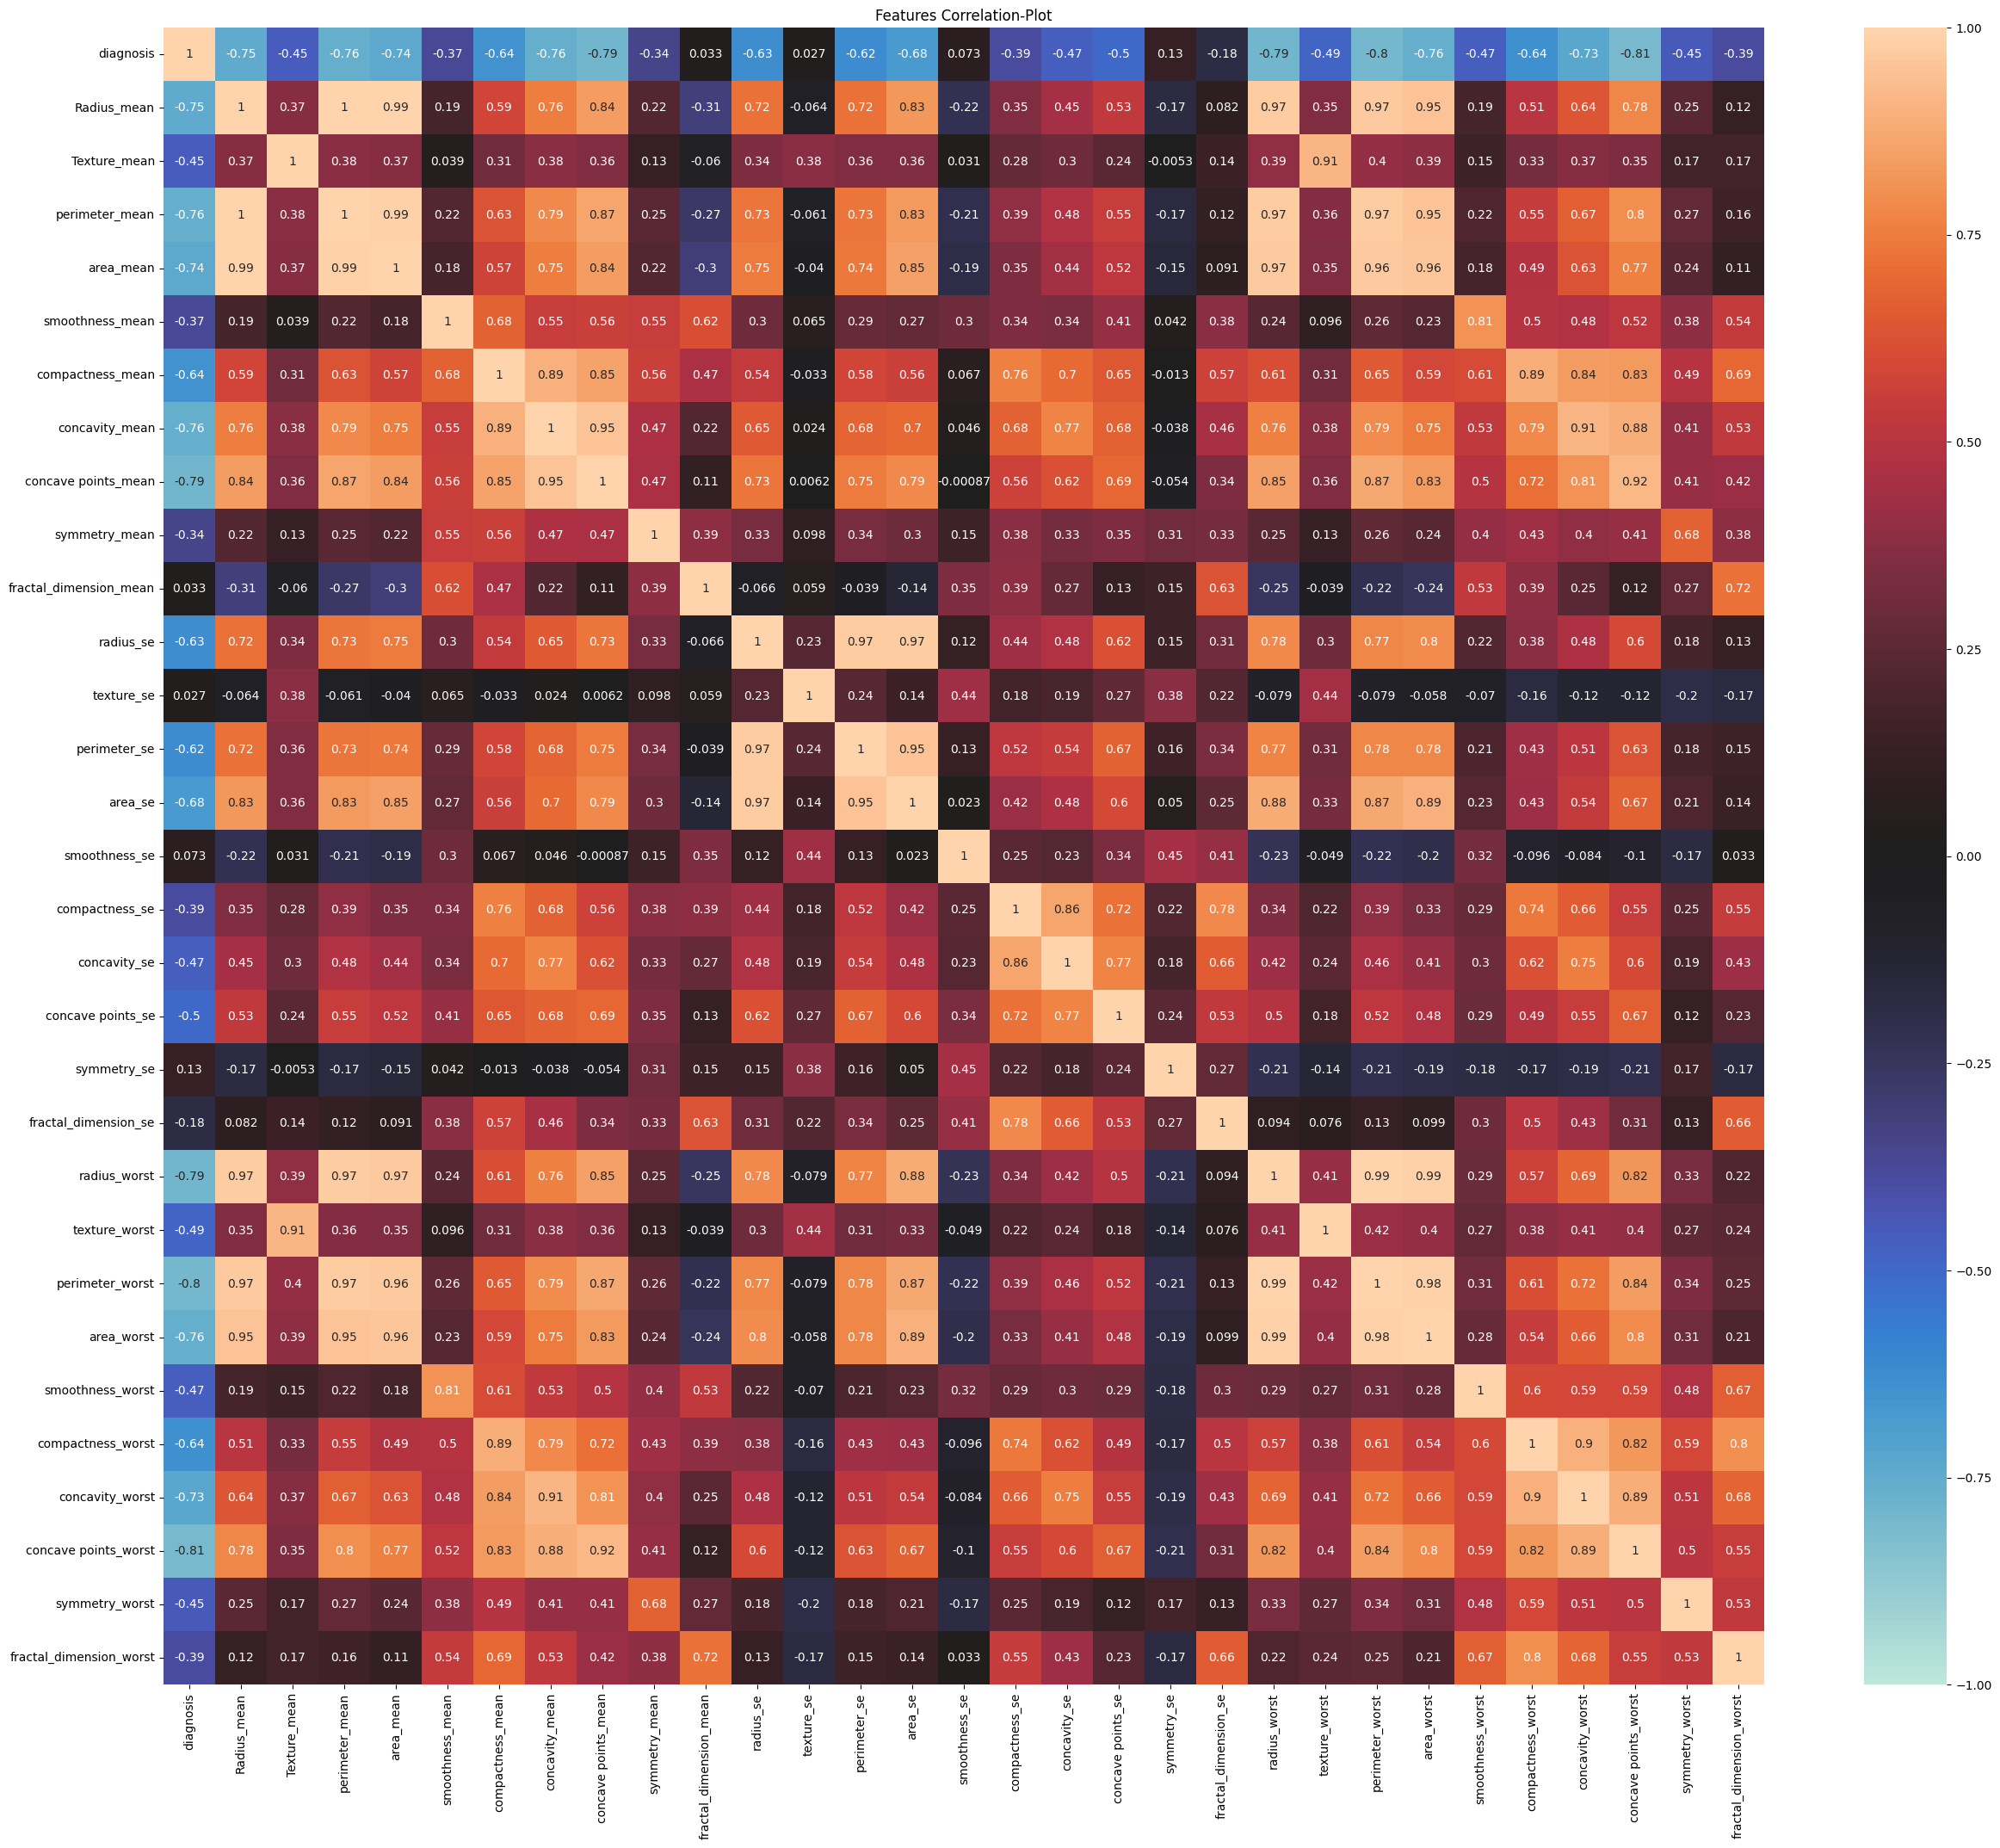

In [ ]:
#Visualizamos las correlaciones nuevamente

features = df.columns
plt.figure(figsize=[30,25])
plt.title('Features Correlation-Plot')
sns.heatmap(df[features].corr(), vmin=-1, vmax=1, center=0, annot=True) #,
plt.show()

La correlación entre las variables transmite mucha información sobre la relación entre ellas. Parece haber una fuerte multicolinealidad en el conjunto de datos.

Comprobemos con diferentes técnicas si podemos mejorar el rendimiento del modelo realizando pasos de Selección/Extracción de Features para cuidar esta multicolinealidad.

  0%|          | 0/30 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
  3%|▎         | 1/30 [00:00<00:19,  1.48it/s]/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
  7%|▋         | 2/30 [00:01<00:17,  1.61it/s]/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
 10%|█         | 3/30 [00:01<00:15,  1.72it/s]/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method 

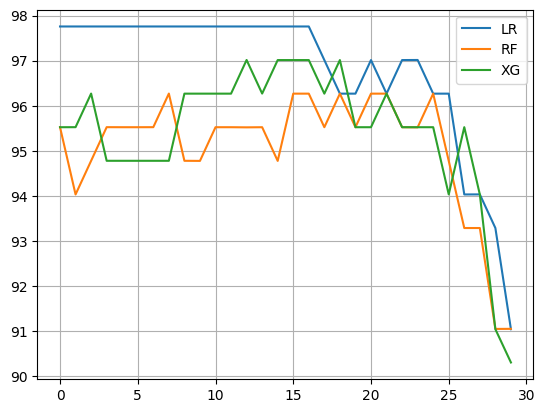

In [ ]:
#Aplicamos las Transformaciones PCA

#scores1.append(f1_score(Test_Y,LogisticRegression().fit(Train_X_std, Train_Y).predict(Test_X_std),average='weighted')*100)
#scores2.append(f1_score(Test_Y,RandomForestClassifier().fit(Train_X_std, Train_Y).predict(Test_X_std),average='weighted')*100)
#scores3.append(f1_score(Test_Y,XGBClassifier().fit(Train_X_std, Train_Y, eval_metric='logloss').predict(Test_X_std),average='weighted')*100)
from tqdm import tqdm
scores1=[]; scores2=[]; scores3=[]
for i in tqdm(range(len(X.columns.values))):
    pca = PCA(n_components=Train_X_std.shape[1]-i)
    Train_X_std_pca = pca.fit_transform(Train_X_std)
    #print('The shape of final transformed training feature set:')
    #print(Train_X_std_pca.shape)
    Train_X_std_pca = pd.DataFrame(Train_X_std_pca)

    Test_X_std_pca = pca.transform(Test_X_std)
    #print('\nThe shape of final transformed testing feature set:')
    #print(Test_X_std_pca.shape)
    Test_X_std_pca = pd.DataFrame(Test_X_std_pca)

    scores1.append(f1_score(Test_Y,LogisticRegression().fit(Train_X_std_pca, Train_Y).predict(Test_X_std_pca),average='weighted')*100)
    scores2.append(f1_score(Test_Y,RandomForestClassifier().fit(Train_X_std_pca, Train_Y).predict(Test_X_std_pca),average='weighted')*100)
    scores3.append(f1_score(Test_Y,XGBClassifier().fit(Train_X_std_pca, Train_Y, eval_metric='logloss').predict(Test_X_std_pca),average='weighted')*100)


plt.plot(scores1, label='LR')
plt.plot(scores2, label='RF')
plt.plot(scores3, label='XG')
#plt.ylim([0.80,0.84])
plt.legend()
plt.grid()
plt.show()

PCA: Notamos mejores puntuaciones al eliminar algunas características multicolineales. Pero para evitar la dimensionalidad, podemos capturar el 90% superior de la varianza de datos explicada por los n principales componentes de PCA





# ***Modelo Predictivo***

# ***Logistic Regression (LR)***

<<<----------------------------------- Evaluating LR ----------------------------------->>>

Accuracy = 97.8%
F1 Score = 97.8%

 Confusion Matrix:
 [[62  3]
 [ 0 69]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.98        65
           1       0.96      1.00      0.98        69

    accuracy                           0.98       134
   macro avg       0.98      0.98      0.98       134
weighted avg       0.98      0.98      0.98       134



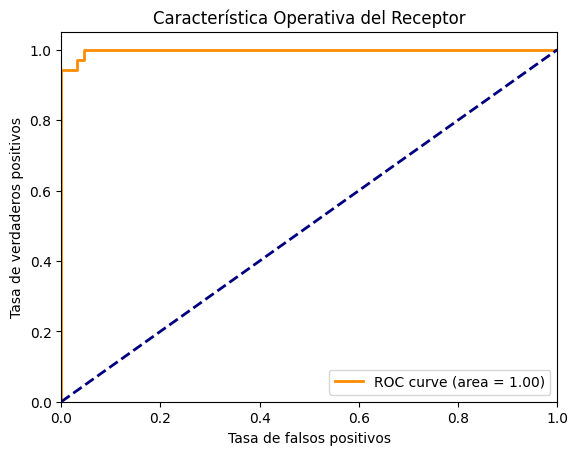


Interpreting the Output of Logistic Regression:

intercept  -1.2295292028729348
classes [0 1]


,coeff
Radius_mean,-0.384293
Texture_mean,-0.509790
perimeter_mean,-0.384787
area_mean,-0.404347
smoothness_mean,-0.103341
compactness_mean,0.070407
concavity_mean,-0.580500
concave points_mean,-0.596098
symmetry_mean,0.119191
fractal_dimension_mean,0.258641


In [ ]:
# Creando analisis de LR
from scipy.stats import loguniform
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

def AUC_ROC_plot(Test_Y, pred_prob):
    fpr, tpr, _ = roc_curve(Test_Y, pred_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Tasa de falsos positivos')
    plt.ylabel('Tasa de verdaderos positivos')
    plt.title('Característica Operativa del Receptor')
    plt.legend(loc='lower right')
    plt.show()

def Classification_Summary(pred, pred_prob, i):
    Evaluation_Results.loc['LR', 'Accuracy'] = round(accuracy_score(Test_Y, pred), 3) * 100
    Evaluation_Results.loc['LR', 'Precision'] = round(precision_score(Test_Y, pred, average='weighted'), 3) * 100
    Evaluation_Results.loc['LR', 'Recall'] = round(recall_score(Test_Y, pred, average='weighted'), 3) * 100
    Evaluation_Results.loc['LR', 'F1-score'] = round(f1_score(Test_Y, pred, average='weighted'), 3) * 100
    Evaluation_Results.loc['LR', 'AUC-ROC score'] = round(roc_auc_score(Test_Y, pred_prob[:, 1]), 3) * 100
    print('{}{}\033[1m Evaluating {} \033[0m{}{}\n'.format('<'*3, '-'*35, 'LR', '-'*35, '>'*3))
    print('Accuracy = {}%'.format(round(accuracy_score(Test_Y, pred), 3) * 100))
    print('F1 Score = {}%'.format(round(f1_score(Test_Y, pred, average='weighted'), 3) * 100))
    print('\n \033[1mConfusion Matrix:\033[0m\n', confusion_matrix(Test_Y, pred))
    print('\n\033[1mClassification Report:\033[0m\n', classification_report(Test_Y, pred))

    AUC_ROC_plot(Test_Y, pred_prob[:, 1])

# Definir datos de entrenamiento y prueba (Train_X_std, Train_Y, Test_X_std, Test_Y) aquí

# Armamos la clasificaciion de regresion lineal
LR_model = LogisticRegression()

space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['l2']  # 'none', 'l1', 'l2', 'elasticnet'
space['C'] = loguniform(1e-5, 100)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

RCV = RandomizedSearchCV(LR_model, space, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)

LR = RCV.fit(Train_X_std, Train_Y).best_estimator_
pred = LR.predict(Test_X_std)
pred_prob = LR.predict_proba(Test_X_std)

# Crear un DataFrame para los resultados de evaluación
Evaluation_Results = pd.DataFrame(index=['LR'])

# Llama a la función de resumen de clasificación
Classification_Summary(pred, pred_prob, 0)

print('\n\033[1mInterpreting the Output of Logistic Regression:\n\033[0m')
print('intercept ', LR.intercept_[0])
print('classes', LR.classes_)
display(pd.DataFrame({'coeff': LR.coef_[0]}, index=Train_X_std.columns))


# ***Decisoin Tree***

<<<----------------------------------- Evaluating LR ----------------------------------->>>

Accuracy = 93.30000000000001%
F1 Score = 93.30000000000001%

 Confusion Matrix:
 [[61  4]
 [ 5 64]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93        65
           1       0.94      0.93      0.93        69

    accuracy                           0.93       134
   macro avg       0.93      0.93      0.93       134
weighted avg       0.93      0.93      0.93       134



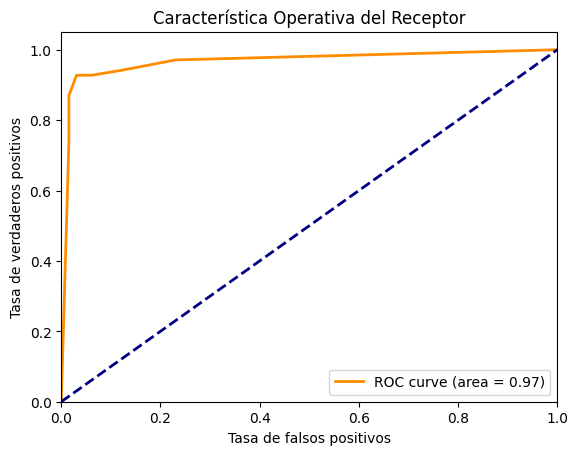


Interpreting the output of Decision Tree:



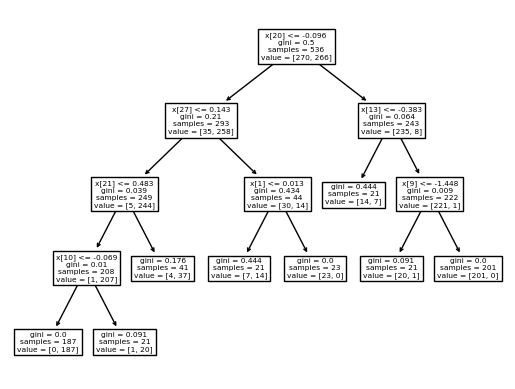

In [ ]:
# Importar las bibliotecas necesarias
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import RandomizedSearchCV, RepeatedStratifiedKFold
from scipy.stats import randint
import matplotlib.pyplot as plt

#Building Decision Tree Classifier
DT = DecisionTreeClassifier()

param_dist = {"max_depth": [3, None],
              "max_features": randint(1, len(features)-1),
              "min_samples_leaf": randint(1, len(features)-1),
              "criterion": ["gini", "entropy"]}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

RCV = RandomizedSearchCV(DT, param_dist, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)

DT = RCV.fit(Train_X_std, Train_Y).best_estimator_
pred = DT.predict(Test_X_std)
pred_prob = DT.predict_proba(Test_X_std)
Classification_Summary(pred, pred_prob, 1)

print('\n\033[1mInterpreting the output of Decision Tree:\n\033[0m')
plot_tree(DT)
plt.show()

# ***Random Forest Classfier***

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


<<<----------------------------------- Evaluating LR ----------------------------------->>>

Accuracy = 96.3%
F1 Score = 96.3%

 Confusion Matrix:
 [[63  2]
 [ 3 66]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96        65
           1       0.97      0.96      0.96        69

    accuracy                           0.96       134
   macro avg       0.96      0.96      0.96       134
weighted avg       0.96      0.96      0.96       134



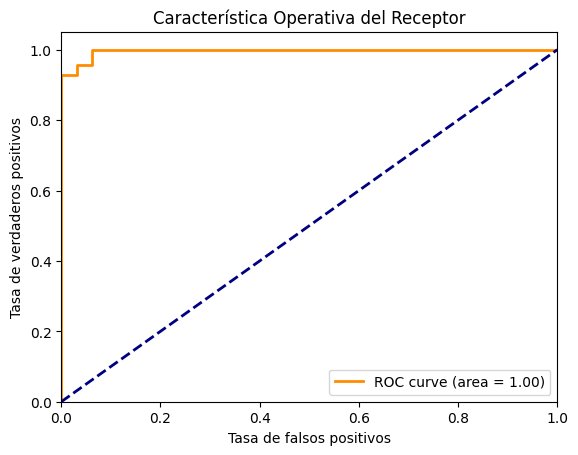


Interpretamos los resultados de Random Forest:



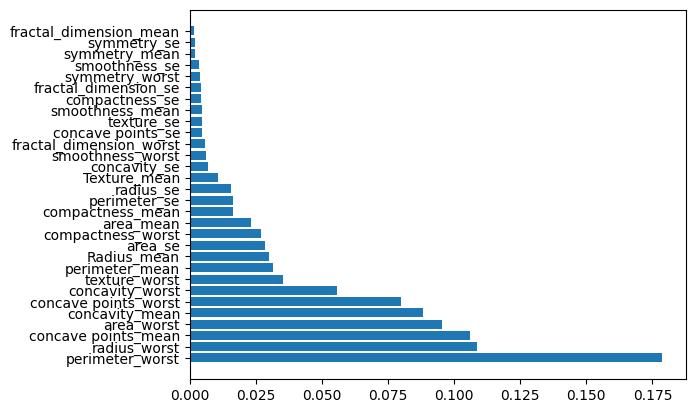

In [ ]:
RF = RandomForestClassifier()

param_dist={'bootstrap': [True, False],
            'max_depth': [10, 20, 50, 100, None],
            'max_features': ['auto', 'sqrt'],
            'min_samples_leaf': [1, 2, 4],
            'min_samples_split': [2, 5, 10],
            'n_estimators': [50, 100]}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

RCV = RandomizedSearchCV(RF, param_dist, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)

RF = RCV.fit(Train_X_std, Train_Y).best_estimator_
pred = RF.predict(Test_X_std)
pred_prob = RF.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,2)

print('\n\033[1mInterpretamos los resultados de Random Forest:\n\033[0m')
rfi=pd.Series(RF.feature_importances_, index=Train_X_std.columns).sort_values(ascending=False)
plt.barh(rfi.index,rfi.values)
plt.show()

# ***Naive Bayes Classfier***

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 5 is smaller than n_iter=50. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


<<<----------------------------------- Evaluating LR ----------------------------------->>>

Accuracy = 94.8%
F1 Score = 94.8%

 Confusion Matrix:
 [[62  3]
 [ 4 65]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.95        65
           1       0.96      0.94      0.95        69

    accuracy                           0.95       134
   macro avg       0.95      0.95      0.95       134
weighted avg       0.95      0.95      0.95       134



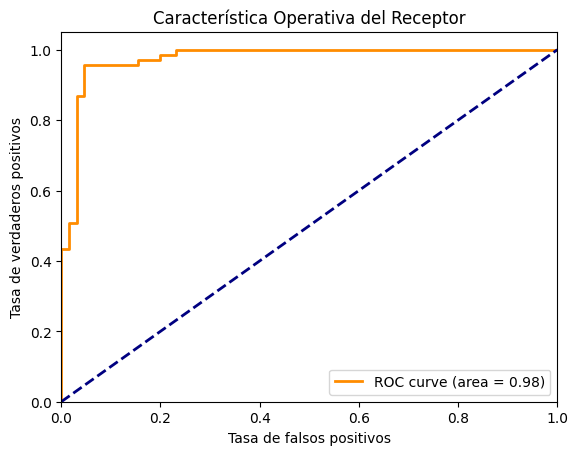

In [ ]:
# Creando analisis de Naive Bayes Classfier
from sklearn.naive_bayes import BernoulliNB

NB = BernoulliNB()

params = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0]}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

RCV = RandomizedSearchCV(NB, params, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)

NB = RCV.fit(Train_X_std, Train_Y).best_estimator_
pred = NB.predict(Test_X_std)
pred_prob = NB.predict_proba(Test_X_std)
Classification_Summary(pred, pred_prob, 3)


# ***Support Vector Machine***

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 36 is smaller than n_iter=50. Running 36 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


<<<----------------------------------- Evaluating LR ----------------------------------->>>

Accuracy = 97.0%
F1 Score = 97.0%

 Confusion Matrix:
 [[62  3]
 [ 1 68]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.97        65
           1       0.96      0.99      0.97        69

    accuracy                           0.97       134
   macro avg       0.97      0.97      0.97       134
weighted avg       0.97      0.97      0.97       134



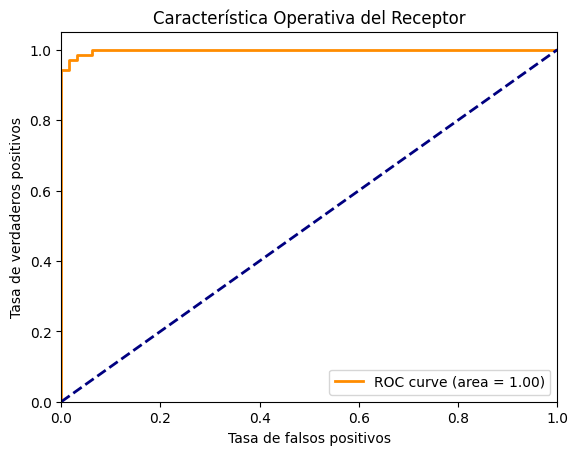

In [ ]:
# Creando analisis de Support Vector Machine
from sklearn.svm import SVC
SVM = SVC(probability=True).fit(Train_X_std, Train_Y)

svm_param = {"C": [.01, .1, 1, 5, 10, 100],
             "gamma": [.01, .1, 1, 5, 10, 100],
             "kernel": ["rbf"],
             "random_state": [1]}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

RCV = RandomizedSearchCV(SVM, svm_param, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)

SVM = RCV.fit(Train_X_std, Train_Y).best_estimator_
pred = SVM.predict(Test_X_std)
pred_prob = SVM.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,4)

# ***K-Nearest***

<<<----------------------------------- Evaluating LR ----------------------------------->>>

Accuracy = 97.0%
F1 Score = 97.0%

 Confusion Matrix:
 [[62  3]
 [ 1 68]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.97        65
           1       0.96      0.99      0.97        69

    accuracy                           0.97       134
   macro avg       0.97      0.97      0.97       134
weighted avg       0.97      0.97      0.97       134



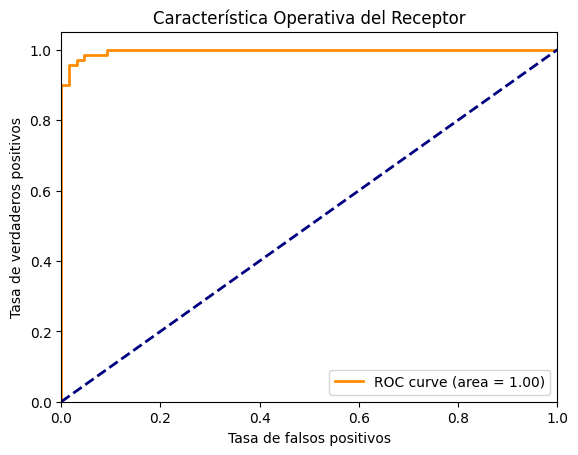

In [ ]:
# Creando analisis de K-Nearest
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()

knn_param = {"n_neighbors": [i for i in range(1,30,5)],
             "weights": ["uniform", "distance"],
             "algorithm": ["ball_tree", "kd_tree", "brute"],
             "leaf_size": [1, 10, 30],
             "p": [1,2]}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

RCV = RandomizedSearchCV(KNN, knn_param, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)

KNN = RCV.fit(Train_X_std, Train_Y).best_estimator_
pred = KNN.predict(Test_X_std)
pred_prob = KNN.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,5)

# ***Gradient Boosting***

<<<----------------------------------- Evaluating LR ----------------------------------->>>

Accuracy = 95.5%
F1 Score = 95.5%

 Confusion Matrix:
 [[62  3]
 [ 3 66]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95        65
           1       0.96      0.96      0.96        69

    accuracy                           0.96       134
   macro avg       0.96      0.96      0.96       134
weighted avg       0.96      0.96      0.96       134



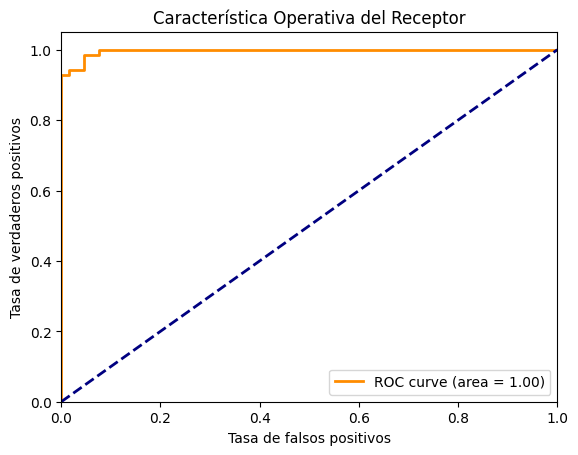

In [ ]:
# Creando analisis de Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
GB = GradientBoostingClassifier().fit(Train_X_std, Train_Y)
param_dist = {
    "n_estimators":[5,20,100,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]
}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

RCV = RandomizedSearchCV(GB, param_dist, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)

GB = RCV.fit(Train_X_std, Train_Y).best_estimator_
pred = GB.predict(Test_X_std)
pred_prob = GB.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,6)

# ***Extreme Gradient Boosting***


In [ ]:
# Building Extreme Gradient Boosting Classifier

XGB_model = XGBClassifier()#.fit(Train_X_std, Train_Y, eval_metric='logloss')

param_dist = {
 "learning_rate" : [0.05,0.10,0.15,0.20,0.25,0.30],
 "max_depth" : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma": [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#RCV = RandomizedSearchCV(XGB_model, param_dist, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)

XGB = XGB_model.fit(Train_X_std, Train_Y, eval_metric='logloss')#.best_estimator_
pred = XGB.predict(Test_X_std)
pred_prob = XGB.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,7)

xgbf=pd.DataFrame(XGB.feature_importances_, index=Train_X_std.columns).sort_values(by=0)
plt.barh(xgbf.index,xgbf.values[:,0])
plt.show()

# ***Resumen ML***

In [ ]:
# Lista de modelos
models = [LR, DT, RF, NB, SVM, KNN, GB]

# Diccionario para almacenar los resultados
results_dict = {'Modelo': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'AUC-ROC': []}

# Función para agregar resultados al diccionario
def add_results(model_name, pred, pred_prob):
    results_dict['Modelo'].append(model_name)
    results_dict['Accuracy'].append(round(accuracy_score(Test_Y, pred), 3) * 100)
    results_dict['Precision'].append(round(precision_score(Test_Y, pred, average='weighted'), 3) * 100)
    results_dict['Recall'].append(round(recall_score(Test_Y, pred, average='weighted'), 3) * 100)
    results_dict['AUC-ROC'].append(round(roc_auc_score(Test_Y, pred_prob[:, 1]), 3) * 100)

# Evaluar cada modelo y agregar resultados al diccionario
for model, model_name in zip(models, ['LR', 'DT', 'RF', 'NB', 'SVM', 'KNN', 'GB']):
    pred = model.predict(Test_X_std)
    pred_prob = model.predict_proba(Test_X_std)
    add_results(model_name, pred, pred_prob)

# Crear un DataFrame con los resultados
results_df = pd.DataFrame(results_dict)

# Mostrar el resumen
print('\n\033[1mResumen de Resultados:\n\033[0m')
print(results_df)



Resumen de Resultados:

  Modelo  Accuracy  Precision  Recall  AUC-ROC
0     LR      97.8       97.9    97.8     99.8
1     DT      93.3       93.3    93.3     96.7
2     RF      96.3       96.3    96.3     99.6
3     NB      94.8       94.8    94.8     97.5
4    SVM      97.0       97.1    97.0     99.8
5    KNN      97.0       97.1    97.0     99.7
6     GB      95.5       95.5    95.5     99.7


# ***Conclusiones & Insights***

Insights: para el planteamiento del problema actual, es más importante centrarse en la puntuación de Recall. Podemos observar que el modelo SVM, Random Forest, Extreme Gradient Boosting y LR funcionaron mejor en el conjunto de datos actual.

Éstos son algunos de las conclusiones clave del proyecto:


1.   El conjunto de datos era bastante pequeño, con un total de alrededor de 569 muestras y, después del preprocesamiento, se eliminaron el 7,3% de las muestras de datos.
2.   Las muestras estaban ligeramente desequilibradas después del procesamiento, por lo que se aplicó la técnica SMOTE a los datos para equilibrar las clases, agregando un 18,8 % más de muestras al conjunto de datos.
3.   Visualizar la distribución de datos y sus relaciones nos ayudó a obtener algunas ideas sobre la relación entre el conjunto de características.
4.   Se llevó a cabo la selección/eliminación de funciones y se preseleccionaron las funciones apropiadas.
5.   Probar múltiples algoritmos con hiperparámetros de ajuste nos brindó cierta comprensión sobre el rendimiento del modelo para varios algoritmos en este conjunto de datos específico.
6.   SVM, Random Forest Classifier y XG-Boosting tuvieron un desempeño excepcionalmente bueno en el conjunto de datos actual, considerando Recall Score como la métrica clave.
7.   Sin embargo, es aconsejable considerar también un modelo más simple como la regresión logística, ya que es más generalizable y computacionalmente menos costoso, pero tiene el costo de ligeras clasificaciones erróneas.

# ***Dividimos los datos para insertarlos en el modelo***



In [ ]:
y=df['diagnosis']
df.drop(['diagnosis'],axis=1,inplace=True)
x=df
y = y.replace({'M':0,'B':1})

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0, stratify=y)

In [ ]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)


(539, 30) (135, 30) (539,) (135,)


In [ ]:
print(y_train.value_counts())
print(y_test.value_counts())

1    270
0    269
Name: diagnosis, dtype: int64
0    68
1    67
Name: diagnosis, dtype: int64


# ***GridSearchCV***

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
%%time
nEstimator = [10,11,12,13,14,15,16]
depth = [5,10,20,30,40,50,60]
criterion=['entropy', 'gini']
min_samples_leaf=[1, 2, 5, 10]
min_samples_split=[2, 5, 10, 15]
max_features = ['auto', 'sqrt','log2']

RF = RandomForestClassifier()
hyperParam = [{'n_estimators':nEstimator,'max_depth': depth,'criterion':criterion,'max_features': max_features,'min_samples_leaf':min_samples_leaf,'min_samples_split':min_samples_split}]
gsv = GridSearchCV(RF,hyperParam,cv=5,verbose=1,scoring='f1_weighted',n_jobs=-1)
gsv.fit(x_train,y_train)
print("Best HyperParameter: ",gsv.best_params_)
print(gsv.best_score_)

Fitting 5 folds for each of 4704 candidates, totalling 23520 fits
Best HyperParameter:  {'criterion': 'entropy', 'max_depth': 40, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 12}
0.9814608394199068
CPU times: user 29 s, sys: 1.99 s, total: 30.9 s
Wall time: 12min 37s


Accuracy on test set: 97.037%
F1-Score on test set: 0.971
-------------------- confusion matrix --------------------


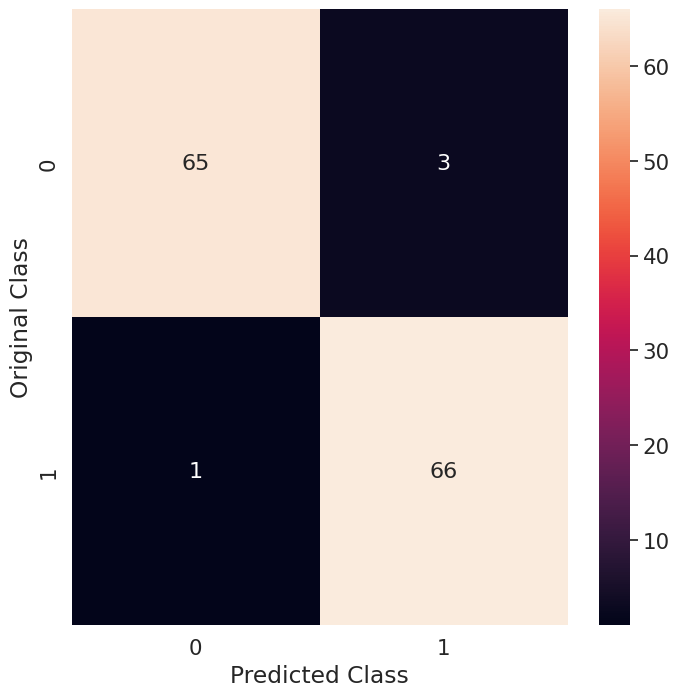

In [ ]:
y_pred=gsv.predict(x_test)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))
print("F1-Score on test set: %0.3f"%(f1_score(y_test, y_pred)))
print("-"*20, "confusion matrix", "-"*20)
plt.figure(figsize=(8,8))
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

# ***Insights sobre Tecnica de Optimizacion del Modelo***

Los hiperparámetros óptimos encontrados son: {'criterion': 'entropy', 'max_depth': 40, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 12}

*   Número de Estimadores (n_estimators):
Aumentar el número de estimadores generalmente mejora la robustez del modelo, pero también aumenta el tiempo de entrenamiento.
Si el número de estimadores es demasiado bajo, el modelo podría ser propenso al sobreajuste.
En este caso, se encontró que n_estimators=12 proporciona el mejor rendimiento.

*   Profundidad Máxima del Árbol (max_depth):
Una mayor profundidad podría conducir a un sobreajuste, mientras que una profundidad baja podría dar lugar a un modelo demasiado simplificado.
En este caso, se encontró que max_depth=40 es la profundidad óptima.

*   Criterio de División (criterion): El criterio 'entropy' y 'gini' son métodos para medir la calidad de una división. 'Entropy' se centra más en la pureza de las clases.
En este caso, se encontró que 'entropy' es el criterio óptimo.

*   Mínimo de Hojas por División (min_samples_leaf) y Mínimo de Muestras por División (min_samples_split):
Estos hiperparámetros controlan la cantidad mínima de muestras requeridas para formar una hoja o realizar una división.
Valores más altos pueden prevenir el sobreajuste.
En este caso, se encontró que min_samples_leaf=2 y min_samples_split=5 son óptimos.

*   Máximo de Características (max_features): Este parámetro controla el número máximo de características consideradas para realizar una división.
Elegir un subconjunto aleatorio de características puede mejorar la generalización.
En este caso, se encontró que max_features='sqrt' es óptimo.

*   Cambios en el Rendimiento: En comparación con un modelo predeterminado sin ajuste de hiperparámetros, es probable que este modelo ajustado proporcione un rendimiento significativamente mejor.
La precisión del 97.037% y el F1-Score de 0.971 en el conjunto de prueba son indicativos de un modelo bien ajustado.
La matriz de confusión puede proporcionar información adicional sobre cómo el modelo clasifica las instancias en las diferentes clases, y si hay clases que son más difíciles de predecir.

*   Razones de Mejora de Rendimiento: El ajuste de hiperparámetros se realiza para optimizar la capacidad del modelo para generalizar a datos no vistos.
La búsqueda de hiperparámetros ayuda a encontrar combinaciones que equilibran la capacidad del modelo para ajustarse a los datos de entrenamiento y generalizar a nuevos datos.
En este caso, los hiperparámetros óptimos indican un equilibrio que evita el sobreajuste y mejora la capacidad del modelo para hacer predicciones precisas en nuevos datos.